# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.39282          0.03316              0.00002   
1            1.00000           0.39394          0.03317              0.00003   
2            1.00000           0.62823          0.52613              0.03557   
3            1.00000           0.30051          0.62972              0.03261   
4            1.00000           0.74686          0.07906              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.80153                0.00009                   0.00037   
1            0.80177                0.00009                   0.00042   
2            0.80557                0.00315                   0.00774   
3            0.80573                0.00242                   0.00537   
4            0.75277                0.00160                   0.00236   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00096            0.00680                0.00000  ...   
1               0.00096            0.00680                0.00001  ...   
2               0.01248            0.00680                0.01245  ...   
3               0.00832            0.00680                0.00750  ...   
4               0.00416            0.00207                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0          40                       1       tcp     none          SF   
1         141                       2       tcp     none        RSTR   
2       91820                      54       tcp      ssl          SF   
3       55543                      36       tcp      ssl          SF   
4           0                       0       udp      dns          S0   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn         resp_443              No            No   
3  orig_reg_or_dyn         resp_443              No            No   
4  orig_reg_or_dyn  resp_well_known              No            No   

                     timestamp  
0   2017-07-07T16:35:59.65674Z  
1  2017-07-07T16:35:59.659567Z  
2  2017-07-07T16:50:46.362101Z  
3  2017-07-07T16:53:52.704343Z  
4  2017-07-07T16:37:22.211056Z  

[5 rows x 293 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.25539          0.76646              0.16341   
1            1.00000           0.74686          0.58042              0.00000   
2            1.00000           0.74686          0.90160              0.00003   
3            1.00000           0.74686          0.44626              0.00003   
4            1.00000           0.27608          0.03172              0.07286   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.61142                0.03924                   0.04301   
1            0.39786                0.00011                   0.00024   
2            0.92823                0.00015                   0.00020   
3            0.94795                0.00011                   0.00017   
4            0.83126                0.00172                   0.00307   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.01536            0.00680                0.00113  ...   
1               0.00064            0.00077                0.00001  ...   
2               0.00032            0.00077                0.00002  ...   
3               0.00032            0.00077                0.00001  ...   
4               0.00480            0.00680                0.00056  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0        9719                      32       tcp      ssl          SF   
1         102                       2       udp      dns          SF   
2         152                       1       udp      dns          SF   
3         103                       1       udp      dns          SF   
4        4680                      15       tcp      ssl          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn    resp_443              No            No   
1  orig_reg_or_dyn     resp_53              No           Yes   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn     resp_53              No            No   
4  orig_reg_or_dyn    resp_443              No            No   

                     timestamp  
0  2017-07-07T16:57:58.662791Z  
1  2017-07-07T16:52:24.025994Z  
2  2017-07-07T17:02:01.742949Z  
3   2017-07-07T16:48:22.71378Z  
4  2017-07-07T16:35:57.059529Z  

[5 rows x 293 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 20719 rows and 293 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        20719.00000       20719.00000      20719.00000   
mean             0.98904           0.62928          0.39206   
std              0.10410           0.21987          0.30558   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.66770          0.06511   
50%              1.00000           0.74686          0.37414   
75%              1.00000           0.74686          0.67677   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          20719.00000        20719.00000            20719.00000   
mean               0.01714            0.76912                0.00196   
std                0.05337            0.24548                0.01239   
min                0.00000            0.00000                0.00000   
25%                0.00000            0.77717                0.00014   
50%                0.00005            0.84059                0.00020   
75%                0.00143            0.92490                0.00099   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               20719.00000           20719.00000        20719.00000   
mean                    0.00276               0.00266            0.00557   
std                     0.01387               0.01264            0.03497   
min                     0.00000               0.00000            0.00000   
25%                     0.00027               0.00064            0.00077   
50%                     0.00033               0.00064            0.00077   
75%                     0.00180               0.00224            0.00119   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            20719.00000               20719.00000           20719.00000   
mean                 0.00104                   0.00108               0.00275   
std                  0.01368                   0.01376               0.01601   
min                  0.00000                   0.00000               0.00000   
25%                  0.00002                   0.00002               0.00062   
50%                  0.00003                   0.00004               0.00062   
75%                  0.00008                   0.00010               0.00187   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 20719.00000 20719.00000 20719.00000 20719.00000  20719.00000   
mean      0.62006     0.00314     0.10565     0.16063      0.01315   
std       0.48538     0.05592     0.30740     0.36719      0.03579   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      20719.00000                     20719.00000   
mean           0.36132                         0.37543   
std            0.26626                         0.31107   
min            0.00000                         0.00000   
25%            0.15920                         0.04599   
50%            0.34019                         0.33877   
75%            0.45112                         0.68857   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         20719.00000   
mean                              0.35017   
std                               0.22138   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.76646              0.16341            0.61142   
1          0.58042              0.00000            0.39786   
2          0.90160              0.00003            0.92823   
3          0.44626              0.00003            0.94795   
4          0.03172              0.07286            0.83126   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.03924               0.01536            0.00680   
1                0.00011               0.00064            0.00077   
2                0.00015               0.00032            0.00077   
3                0.00011               0.00032            0.00077   
4                0.00172               0.00480            0.00680   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00113               0.00997    0.00000    0.00000   
1                0.00001               0.00062    1.00000    0.00000   
2                0.00002               0.00031    1.00000    0.00000   
3                0.00001               0.00031    1.00000    0.00000   
4                0.00056               0.00467    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    1.00000      0.05128                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    0.00000      0.00000                           1   
4     0.00000    1.00000      0.05128                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    1                   0   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    0                   1   
4                   0                    1                   0   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     1   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      0                     0   
4                           0                      0                     1   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     0                           0                       0   
1                     1                           0                       1   
2                     1                           0                       1   
3                     1                           0                       1   
4                     0                           0                       0   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S2',
       'resp_resp_connection.conn_state_mode_SF'],
      dtype='object', length=204)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 204 principal components: 1.0000000000000002


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999983]
Variance Captured by First  10 Principal Components: [0.90874068]
Variance Captured by First   7 Principal Components: [0.87711171]
Variance Captured by First   5 Principal Components: [0.84247957]
Variance Captured by First   2 Principal Components: [0.75703424]
Variance Captured by the First Principal Component:  [0.61865425]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.38266842
Variance of connection.duration                       : 0.23598583
Variance of connection.orig_p                         : 0.08640474
Variance of connection.orig_bytes                     : 0.05197525
Variance of connection.orig_pkts                      : 0.03253360
Variance of connection.resp_p                         : 0.02857458
Variance of connection.resp_bytes                     : 0.02433716
Variance of connection.resp_pkts                      : 0.01939042
Variance of dns_count                                 : 0.01524173
Variance of ssh_count                                 : 0.01256765
Variance of http_count                                : 0.01013201
Variance of ssl_count                                 : 0.00892931
Variance of files_count                               : 0.00789565
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00718869
Variance of orig_p_cat_orig_well_known                : 0.0066

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0           -0.01626              0.01050           -0.01861   
1            0.02914             -0.00349            0.03778   
2            0.24117              0.00465           -0.05506   
3            0.17906             -0.00790           -0.05059   
4            0.01073             -0.00364           -0.01535   
..               ...                  ...                ...   
199          0.00000              0.00000           -0.00000   
200         -0.00000              0.00000            0.00000   
201         -0.00000             -0.00000            0.00000   
202          0.00000              0.00000           -0.00000   
203         -0.00000             -0.00000           -0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00106               0.00120            0.00205   
1                 -0.00039              -0.00053           -0.00131   
2                  0.00004               0.00075            0.00357   
3                 -0.00051              -0.00071            0.00437   
4                  0.00020              -0.00064            0.00873   
..                     ...                   ...                ...   
199               -0.00000               0.00000           -0.00000   
200               -0.00000               0.00000            0.00000   
201                0.00000              -0.00000           -0.00000   
202               -0.00000               0.00000            0.00000   
203               -0.00000               0.00000           -0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00064               0.00134   -0.22020    0.00039   
1                 -0.00025              -0.00059    0.09183   -0.00157   
2                  0.00031               0.00074   -0.03455    0.00288   
3                 -0.00023              -0.00074   -0.04702    0.00536   
4                 -0.00075              -0.00088   -0.06412    0.00840   
..                     ...                   ...        ...        ...   
199               -0.00000              -0.00000    0.00000   -0.02433   
200                0.00000              -0.00000    0.00000   -0.02083   
201                0.00000              -0.00000    0.00000    0.02634   
202               -0.00000               0.00000   -0.00000   -0.01639   
203               -0.00000               0.00000   -0.00000   -0.00000   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.06616    0.10399      0.00833                    -0.00120   
1      -0.03121   -0.02680     -0.00280                    -0.00069   
2      -0.13461    0.18495      0.00399                    -0.00493   
3       0.19990   -0.28439     -0.00260                    -0.01150   
4      -0.18498    0.00520     -0.01279                    -0.00488   
..          ...        ...          ...                         ...   
199    -0.00000   -0.00191     -0.00000                     0.00228   
200     0.00000    0.00038     -0.00000                    -0.01771   
201     0.00000    0.00511     -0.00000                    -0.01389   
202    -0.00000   -0.00509     -0.00000                     0.00159   
203    -0.00000   -0.00000      0.00000                     0.00000   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.00120              0.00123             0.00057   
1                       0.00069              0.00029            -0.00222   
2                       0.00493              0.00249             0.00331   
3                       0.01150              0.00559             0.00955   
4                       0.00488             -0.00221             0.02494   
..                          ...                  ...                 ...   
199                     0.00228              0.00678            -0.01059   
200                    -0.01771  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0      2.66903 -0.55055  1.58901 -0.80995 -0.10596 -0.37160 -0.44788  0.21037   
1     -2.12242  0.74138  0.77488  0.67515  0.46554 -0.68102  0.07705  0.71645   
2     -0.13204  3.10790  0.38122  0.43367 -0.07285 -0.08921  0.03394  0.26679   
3     -0.82529  2.85368 -0.01405  0.23673  0.49234 -0.10962 -0.82326 -1.26184   
4      2.76950 -0.87605 -0.80848 -1.14220  0.20374 -0.03418 -0.72917  0.14429   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  2.76087 -1.01138 -0.51945 -1.09824  0.73652 -1.21714  0.45480 -0.36079   
20715 -2.00786 -0.98280 -0.22735 -0.43793 -0.41697  0.20731  0.53517 -0.21012   
20716  2.64706 -0.46685  0.87570 -1.16675 -0.25119  0.15478 -0.38154 -0.11408   
20717 -2.01509 -1.01072  0.72146  0.37764 -0.32763 -0.05608 -0.07485  0.18811   
20718  2.49765 -0.50566 -0.80497  1.01812 -1.16713  0.39319 -0.82302  0.15528   

           8        9        10       11       12       13       14       15   \
0     -0.45962  0.02018 -0.23729  0.10843  0.12715 -0.27976 -0.00599 -0.01333   
1      0.98244  0.36210  0.14848  1.75379 -0.39392  1.19811 -0.90061  0.14703   
2     -0.83588  0.05635  0.17831  0.09845  0.17661  0.18235 -0.21388  0.11934   
3      0.45141 -0.33751 -0.02840 -0.12946 -0.06211 -0.16466  0.17515 -0.10136   
4     -0.13358  0.15119  0.26405  0.11822  0.00779  0.24698  0.16673 -0.08677   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714 -0.49308 -0.08473 -0.20286  0.13057 -0.59463 -0.06421 -0.07029  0.29540   
20715  0.59640 -0.06785 -0.10023 -0.09211  0.40894 -0.25863 -0.01360  0.01030   
20716 -0.08915  0.29463 -0.23931  0.05937 -0.29801 -0.05236 -0.14759  0.02867   
20717 -0.11525 -0.13914  0.35853 -0.20276 -0.81343  0.18735  0.10362 -0.16508   
20718  0.18281  0.41161 -0.34553 -0.05837  0.00804  0.05932  0.05344 -0.01634   

           16       17       18       19       20       21       22       23   \
0     -0.17431  0.06039 -0.04255  0.00764  0.38022 -0.02058  0.10946 -0.19719   
1      0.02620  0.02449  0.05275  0.09133 -0.05042 -0.36980 -0.09908 -0.43625   
2      0.10672  0.01480  0.14294 -0.09664 -0.14761  0.03808  0.22902 -0.11610   
3     -0.11780 -0.03443 -0.08312  0.00262 -0.05440 -0.09642 -0.26717  0.14726   
4     -0.04372  0.06189 -0.14096 -0.04642 -0.09607  0.50743 -0.53234 -0.62294   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  0.16637  0.14144 -0.08366  0.26547 -0.16345  0.28756  0.17749  0.37058   
20715 -0.13038  0.15083  0.03083  0.01116  0.03760 -0.11882 -0.12284  0.00442   
20716  0.06588 -0.11133  0.06613  0.01983  0.00761  0.10021 -0.06606  0.04798   
20717 -0.00523 -0.10795  0.11355  0.22094 -0.03920 -0.17682 -0.05325 -0.27362   
20718 -0.02607 -0.14825  0.13527  0.02272  0.10559  0.03377 -0.01394 -0.01502   

           24       25       26       27       28       29       30       31   \
0     -0.11267 -0.08590 -0.24990  0.07971 -0.03320  0.07853 -0.01121  0.07095   
1      0.06961 -0.83556 -0.07502  0.02327  0.02830 -0.19834 -0.32550  0.02538   
2      0.23340  0.19363  0.28771  0.17279 -0.56812  0.00120 -0.11120 -0.02822   
3     -0.08164 -0.30483 -0.08374  0.05004  0.12892  0.17894  0.31541 -0.27826   
4     -0.42435  0.01491  0.48433  0.24377  0.15413 -0.05021 -0.05531  0.03421   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  0.26803 -0.03106 -0.46728 -0.05286 -0.10785 -0.33620  0.14241 -0.03809   
20715 -0.20055  0.04433 -0.19403  0.05556 -0.24291  0.12089 -0.11183  0.00163   
20716 -0.00875 -0.01041  0.07421  0.02286  0.05085 -0.07088 -0.05465 -0.05490   
20717  0.08010 -0.00883 -0.10851 -0.04151  0.03027  0.00953 -0.06034 -0.05940   
20718  0.05053  0.02970 -0.02440  0.04484  0.07170  0.04944 -0.08952 -0.02980   

           32       33       34       35       36       37       38       39   \
0     -0.08742 -0.08284  0.07212 -0.05

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:58:18.
DBSCAN finished (00:58:52)
Done at 00:58:52.


In [20]:
print_str

'DBSCAN finished (00:58:52)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     2,     3, ..., 20716, 20717, 20718])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[ 2.66903427e+00, -5.50549092e-01,  1.58901224e+00, ...,
        -5.48581229e-04, -3.78492411e-04, -3.22285658e-04],
       [-1.32043588e-01,  3.10790079e+00,  3.81216966e-01, ...,
        -3.69547143e-03, -3.75502670e-03,  8.06070796e-05],
       [-8.25290931e-01,  2.85367510e+00, -1.40511178e-02, ...,
         1.24517845e-03,  8.19648436e-04,  7.48814922e-04],
       ...,
       [ 2.64705506e+00, -4.66854021e-01,  8.75701878e-01, ...,
         2.74059679e-04,  8.85733820e-06,  1.07013915e-03],
       [-2.01509033e+00, -1.01072237e+00,  7.21457616e-01, ...,
         4.96986282e-06,  6.60599273e-04,  9.91072409e-05],
       [ 2.49764672e+00, -5.05664754e-01, -8.04968184e-01, ...,
         1.76533845e-04,  1.13507694e-04,  7.53287604e-04]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([ 0, -1,  1, ...,  0,  3,  0])

In [25]:
y_db

array([ 0, -1,  1, ...,  0,  3,  0])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0  2.66903 -0.55055  1.58901 -0.80995 -0.10596 -0.37160 -0.44788  0.21037   
1 -2.12242  0.74138  0.77488  0.67515  0.46554 -0.68102  0.07705  0.71645   
2 -0.13204  3.10790  0.38122  0.43367 -0.07285 -0.08921  0.03394  0.26679   
3 -0.82529  2.85368 -0.01405  0.23673  0.49234 -0.10962 -0.82326 -1.26184   
4  2.76950 -0.87605 -0.80848 -1.14220  0.20374 -0.03418 -0.72917  0.14429   

         8        9       10       11       12       13       14       15  \
0 -0.45962  0.02018 -0.23729  0.10843  0.12715 -0.27976 -0.00599 -0.01333   
1  0.98244  0.36210  0.14848  1.75379 -0.39392  1.19811 -0.90061  0.14703   
2 -0.83588  0.05635  0.17831  0.09845  0.17661  0.18235 -0.21388  0.11934   
3  0.45141 -0.33751 -0.02840 -0.12946 -0.06211 -0.16466  0.17515 -0.10136   
4 -0.13358  0.15119  0.26405  0.11822  0.00779  0.24698  0.16673 -0.08677   

        16       17       18       19       20       21       22       23  \
0 -0.17431  0.06039 -0.04255  0.00764  0.38022 -0.02058  0.10946 -0.19719   
1  0.02620  0.02449  0.05275  0.09133 -0.05042 -0.36980 -0.09908 -0.43625   
2  0.10672  0.01480  0.14294 -0.09664 -0.14761  0.03808  0.22902 -0.11610   
3 -0.11780 -0.03443 -0.08312  0.00262 -0.05440 -0.09642 -0.26717  0.14726   
4 -0.04372  0.06189 -0.14096 -0.04642 -0.09607  0.50743 -0.53234 -0.62294   

        24       25       26      27       28       29       30       31  \
0 -0.11267 -0.08590 -0.24990 0.07971 -0.03320  0.07853 -0.01121  0.07095   
1  0.06961 -0.83556 -0.07502 0.02327  0.02830 -0.19834 -0.32550  0.02538   
2  0.23340  0.19363  0.28771 0.17279 -0.56812  0.00120 -0.11120 -0.02822   
3 -0.08164 -0.30483 -0.08374 0.05004  0.12892  0.17894  0.31541 -0.27826   
4 -0.42435  0.01491  0.48433 0.24377  0.15413 -0.05021 -0.05531  0.03421   

        32       33       34       35       36       37       38       39  \
0 -0.08742 -0.08284  0.07212 -0.05128 -0.11582 -0.03693 -0.17947 -0.06747   
1 -0.10870  0.13492 -0.02749  0.05671 -0.06176 -0.04592  0.07896 -0.01907   
2  0.01401 -0.04662 -0.01628 -0.01980 -0.00430 -0.05816  0.07457 -0.06583   
3  0.08431  0.04509 -0.04315  0.07422  0.03498 -0.09435  0.10881 -0.12267   
4  0.24511 -0.11037 -0.31856 -0.01437 -0.08912 -0.05090 -0.00365  0.11341   

        40       41       42      43       44      45       46       47  \
0  0.04746 -0.07238 -0.02736 0.08261  0.08553 0.16205  0.01887  0.25844   
1 -0.00128  0.00162  0.00089 0.05199  0.05332 0.00319  0.05091 -0.00340   
2 -0.01886 -0.10421 -0.00183 0.02744 -0.02743 0.07228 -0.11712 -0.00989   
3  0.13885  0.06590 -0.05780 0.03663  0.02053 0.03295 -0.02304 -0.00467   
4  0.02850 -0.01022  0.00664 0.00170  0.04535 0.01834 -0.01645 -0.07666   

        48       49       50       51       52       53       54       55  \
0 -0.09893 -0.07685 -0.06586 -0.03446  0.02989 -0.09961 -0.01533  0.14215   
1  0.00042 -0.01295  0.02477 -0.01390  0.00195  0.00090  0.00161 -0.00936   
2 -0.00674 -0.00425 -0.03772  0.05467  0.02150 -0.02225  0.01643  0.02769   
3 -0.02548  0.01841 -0.03004  0.00258  0.04145 -0.01820 -0.01787  0.03780   
4 -0.02091 -0.01720  0.04375 -0.02570 -0.05994 -0.08099 -0.10310  0.00760   

        56       57       58       59      60       61       62      63  \
0 -0.06464  0.03449 -0.09079  0.04563 0.00652 -0.06483 -0.10761 0.03570   
1 -0.01902 -0.06743 -0.03639 -0.05723 0.12394 -0.06921  0.07820 0.01169   
2  0.03124  0.01475  0.00602  0.00110 0.00549  0.00138 -0.00965 0.00701   
3  0.04474 -0.02052 -0.01324 -0.02845 0.04174  0.00403  0.00756 0.01329   
4 -0.06804  0.00442  0.01869  0.00343 0.00344 -0.04137  0.00684 0.03174   

        64       65       66       67       68       69       70       71  \
0 -0.03098  0.01564  0.04547  0.08236 -0.06745  0.00139 -0.00481 -0.02150   
1 -0.03016 -0.08157  0.01951 -0.00638 -0.03433  0.03075  0.00632  0.00551   
2 -0.00417 -0.00058  0.00382  0.01390  0.03667 -0.00031 -0.00761 -0.01111   
3  0.01751  0.03562 -0.0254

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 3    8030
 0    6126
 1    3012
-1    1385
 2    1013
 4     431
 6     410
 5     312
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6])

## 3. Results

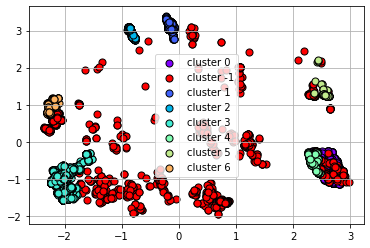

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

K_CLUSTERS = len(pca_X['cluster'].value_counts())

colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

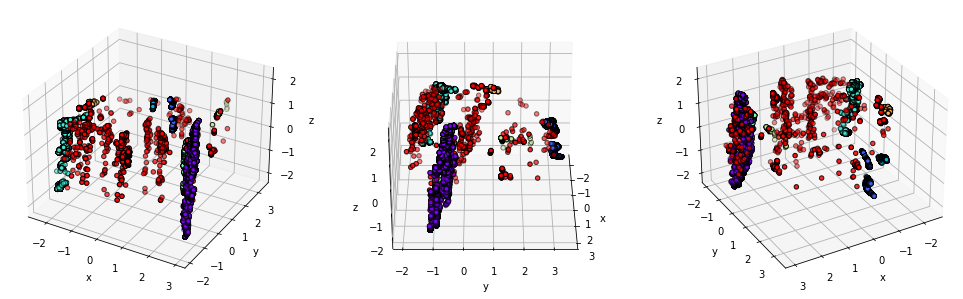

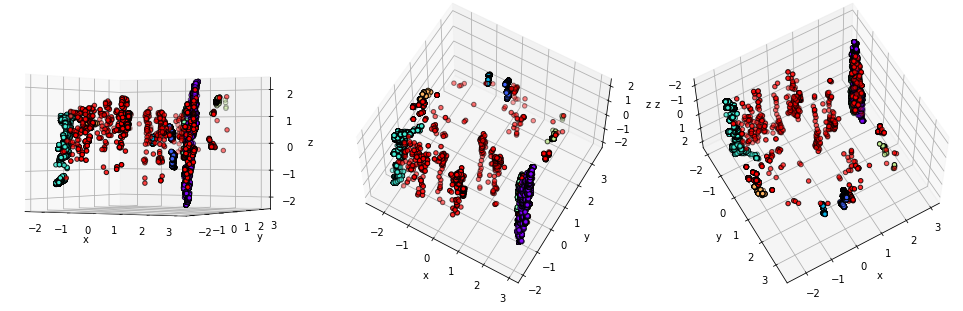

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0      2.66903 -0.55055  1.58901 -0.80995 -0.10596 -0.37160 -0.44788  0.21037   
1     -2.12242  0.74138  0.77488  0.67515  0.46554 -0.68102  0.07705  0.71645   
2     -0.13204  3.10790  0.38122  0.43367 -0.07285 -0.08921  0.03394  0.26679   
3     -0.82529  2.85368 -0.01405  0.23673  0.49234 -0.10962 -0.82326 -1.26184   
4      2.76950 -0.87605 -0.80848 -1.14220  0.20374 -0.03418 -0.72917  0.14429   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  2.76087 -1.01138 -0.51945 -1.09824  0.73652 -1.21714  0.45480 -0.36079   
20715 -2.00786 -0.98280 -0.22735 -0.43793 -0.41697  0.20731  0.53517 -0.21012   
20716  2.64706 -0.46685  0.87570 -1.16675 -0.25119  0.15478 -0.38154 -0.11408   
20717 -2.01509 -1.01072  0.72146  0.37764 -0.32763 -0.05608 -0.07485  0.18811   
20718  2.49765 -0.50566 -0.80497  1.01812 -1.16713  0.39319 -0.82302  0.15528   

             8        9       10       11       12       13       14       15  \
0     -0.45962  0.02018 -0.23729  0.10843  0.12715 -0.27976 -0.00599 -0.01333   
1      0.98244  0.36210  0.14848  1.75379 -0.39392  1.19811 -0.90061  0.14703   
2     -0.83588  0.05635  0.17831  0.09845  0.17661  0.18235 -0.21388  0.11934   
3      0.45141 -0.33751 -0.02840 -0.12946 -0.06211 -0.16466  0.17515 -0.10136   
4     -0.13358  0.15119  0.26405  0.11822  0.00779  0.24698  0.16673 -0.08677   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714 -0.49308 -0.08473 -0.20286  0.13057 -0.59463 -0.06421 -0.07029  0.29540   
20715  0.59640 -0.06785 -0.10023 -0.09211  0.40894 -0.25863 -0.01360  0.01030   
20716 -0.08915  0.29463 -0.23931  0.05937 -0.29801 -0.05236 -0.14759  0.02867   
20717 -0.11525 -0.13914  0.35853 -0.20276 -0.81343  0.18735  0.10362 -0.16508   
20718  0.18281  0.41161 -0.34553 -0.05837  0.00804  0.05932  0.05344 -0.01634   

            16       17       18       19       20       21       22       23  \
0     -0.17431  0.06039 -0.04255  0.00764  0.38022 -0.02058  0.10946 -0.19719   
1      0.02620  0.02449  0.05275  0.09133 -0.05042 -0.36980 -0.09908 -0.43625   
2      0.10672  0.01480  0.14294 -0.09664 -0.14761  0.03808  0.22902 -0.11610   
3     -0.11780 -0.03443 -0.08312  0.00262 -0.05440 -0.09642 -0.26717  0.14726   
4     -0.04372  0.06189 -0.14096 -0.04642 -0.09607  0.50743 -0.53234 -0.62294   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  0.16637  0.14144 -0.08366  0.26547 -0.16345  0.28756  0.17749  0.37058   
20715 -0.13038  0.15083  0.03083  0.01116  0.03760 -0.11882 -0.12284  0.00442   
20716  0.06588 -0.11133  0.06613  0.01983  0.00761  0.10021 -0.06606  0.04798   
20717 -0.00523 -0.10795  0.11355  0.22094 -0.03920 -0.17682 -0.05325 -0.27362   
20718 -0.02607 -0.14825  0.13527  0.02272  0.10559  0.03377 -0.01394 -0.01502   

            24       25       26       27       28       29       30       31  \
0     -0.11267 -0.08590 -0.24990  0.07971 -0.03320  0.07853 -0.01121  0.07095   
1      0.06961 -0.83556 -0.07502  0.02327  0.02830 -0.19834 -0.32550  0.02538   
2      0.23340  0.19363  0.28771  0.17279 -0.56812  0.00120 -0.11120 -0.02822   
3     -0.08164 -0.30483 -0.08374  0.05004  0.12892  0.17894  0.31541 -0.27826   
4     -0.42435  0.01491  0.48433  0.24377  0.15413 -0.05021 -0.05531  0.03421   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20714  0.26803 -0.03106 -0.46728 -0.05286 -0.10785 -0.33620  0.14241 -0.03809   
20715 -0.20055  0.04433 -0.19403  0.05556 -0.24291  0.12089 -0.11183  0.00163   
20716 -0.00875 -0.01041  0.07421  0.02286  0.05085 -0.07088 -0.05465 -0.05490   
20717  0.08010 -0.00883 -0.10851 -0.04151  0.03027  0.00953 -0.06034 -0.05940   
20718  0.05053  0.02970 -0.02440  0.04484  0.07170  0.04944 -0.08952 -0.02980   

            32       33       34       35       36       37       38       39  \
0     -0.08742 -0.08284  0.07212 -0.0512

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0          -1     1385      tcp    none         SF  orig_reg_or_dyn   
1           0     6126      tcp     ssl         SF  orig_reg_or_dyn   
2           1     3012      udp     dns         SF  orig_reg_or_dyn   
3           2     1013      udp     dns         SF  orig_reg_or_dyn   
4           3     8030      udp     dns         SF  orig_reg_or_dyn   
5           4      431      tcp    none        REJ  orig_reg_or_dyn   
6           5      312      tcp     ssl         SF  orig_reg_or_dyn   
7           6      410      udp     dns         SF  orig_reg_or_dyn   

        resp_p_cat  connection.time  connection.duration  \
0  resp_well_known          0.53854              0.01559   
1          resp_80          0.30369              0.05052   
2          resp_53          0.35333              0.00019   
3          resp_53          0.61856              0.00010   
4          resp_53          0.38766              0.00007   
5         resp_reg          0.48402              0.00002   
6         resp_443          0.70612              0.07327   
7          resp_53          0.69315              0.00005   

   connection.orig_bytes  connection.orig_pkts  connection.resp_bytes  \
0                0.00236               0.00350                0.00050   
1                0.00507               0.00650                0.00323   
2                0.00013               0.00033                0.00002   
3                0.00013               0.00033                0.00002   
4                0.00023               0.00076                0.00003   
5                0.00000               0.00032                0.00000   
6                0.01212               0.00835                0.00226   
7                0.00018               0.00064                0.00003   

   connection.resp_pkts  dns_count  ssh_count  http_count  ssl_count  \
0               0.00278    0.27581    0.04693     0.05199    0.06137   
1               0.00712    0.00000    0.00000     0.34558    0.47878   
2               0.00032    1.00000    0.00000     0.00000    0.00000   
3               0.00032    1.00000    0.00000     0.00000    0.00000   
4               0.00065    1.00000    0.00000     0.00000    0.00000   
5               0.00031    0.00000    0.00000     0.00000    0.00000   
6               0.00814    0.00000    0.00000     0.00000    0.99359   
7               0.00062    1.00000    0.00000     0.00000    0.00000   

   files_count  
0      0.00907  
1      0.04092  
2      0.00000  
3      0.00000  
4      0.00000  
5      0.00000  
6      0.02959  
7      0.00000

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

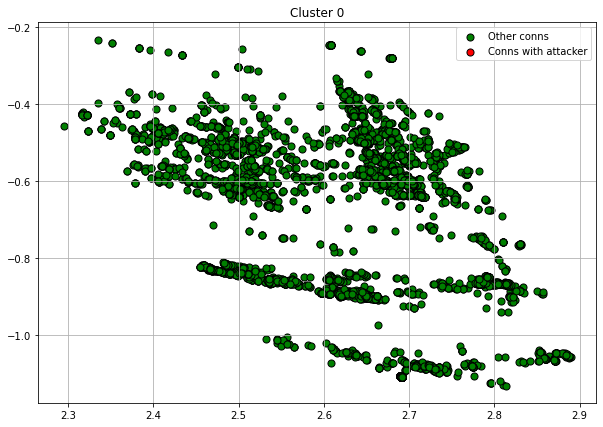

Total num of conns: 6126

Attacker conns ratio:
No    6126
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    2294
192.168.10.19    1023
192.168.10.15     706
192.168.10.5      499
192.168.10.9      452
192.168.10.8      406
192.168.10.16     334
192.168.10.17     193
192.168.10.12     105
192.168.10.25      88
192.168.10.51      26
Name: originated_ip, dtype: int64

67.72.99.137      479
178.255.83.1      147
162.208.20.178    133
23.61.187.27      115
72.21.91.29       104
                 ... 
52.84.143.243       1
54.199.195.232      1
72.5.205.59         1
172.217.10.40       1
173.205.10.88       1
Name: responded_ip, Length: 1370, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.003682Z
timestamp max = 2017-07-07T17:04:36.556763Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
6482   CDqvLT2HnpQmXcxvr8            1.00000  192.168.10.19           0.24583   
18371  CUVWpb3LOR12e2Wx66            1.00000  192.168.10.14           0.25499   
17606   CHnKpx2FbApqx9Nle            1.00000  192.168.10.14           0.18562   
13017  Csg95c1Qmwhqym8xf9            1.00000  192.168.10.17           0.82847   
13593  CMqwXr2WJs13gx9m1k            1.00000  192.168.10.14           0.66770   
11898  COgMH04TXMHn4fD557            1.00000  192.168.10.19           0.24583   
13203  CGHbb634nN21bptraf            1.00000  192.168.10.14           0.80731   
9687   CpSN9n1Wg3HqO7Ceae            1.00000   192.168.10.9           0.64156   
1047    CutWT3OVZwxUnaHEl            1.00000  192.168.10.14           0.07213   
7760   C3QGSe3PnmHt2oKth3            1.00000   192.168.10.9           0.67209   
8232   CIatRO1WZRE3Cz457j            1.00000  192.168.10.15           0.49300   
13217  CxAJec2QPffOpHQts4            1.00000  192.168.10.15           0.47045   
20311  Cn1XPw3kgQvpqVuAR5            1.00000   192.168.10.5           0.39381   
13426  CcoVxb2P3Cx9jSJf3j            1.00000  192.168.10.19           0.24583   
1427    Cjr3NByTNMmbGsIA5            1.00000  192.168.10.16           0.26502   

          responded_ip                    timestamp  connection.time  \
6482      67.72.99.137  2017-07-07T16:36:43.740286Z          0.05767   
18371     69.147.82.61  2017-07-07T16:45:20.837052Z          0.34515   
17606     52.54.235.77  2017-07-07T16:36:30.828039Z          0.05049   
13017   213.19.161.155  2017-07-07T16:59:17.243342Z          0.81015   
13593   172.217.12.130  2017-07-07T16:53:03.463382Z          0.60235   
11898     67.72.99.137  2017-07-07T16:36:12.257644Z          0.04017   
13203   207.200.74.133   2017-07-07T16:35:04.26691Z          0.00237   
9687     166.78.192.64  2017-07-07T16:42:56.555758Z          0.26494   
1047     23.208.216.37  2017-07-07T16:36:18.273677Z          0.04351   
7760   173.241.242.143  2017-07-07T16:48:33.300423Z          0.45215   
8232    129.33.138.215  2017-07-07T16:39:28.015798Z          0.14900   
13217  123.125.115.164  2017-07-07T16:35:43.103219Z          0.02396   
20311    104.79.143.90  2017-07-07T16:58:34.700739Z          0.78650   
13426     67.72.99.137  2017-07-07T16:36:41.891804Z          0.05664   
1427      72.21.91.103  2017-07-07T17:02:33.396154Z          0.91920   

       duration  connection.duration protocol service conn_state  \
6482    0.08242              0.00009      tcp    http         SF   
18371  90.79598              0.10157      tcp    http         SF   
17606   0.18887              0.00021      tcp     ssl         SF   
13017  20.25602              0.02266      tcp    http         SF   
13593   0.12567              0.00014      tcp     ssl         SF   
11898   0.07839              0.00009      tcp    http         SF   
13203 106.04056              0.11862      tcp    none         SF   
9687   66.54807              0.07445      tcp     ssl         SF   
1047    0.45755              0.00051      tcp    http         SF   
7760    5.09883              0.00570      tcp    none         SF   
8232    5.77390              0.00646      tcp     ssl         SF   
13217   6.62163              0.00741      tcp     ssl         SF   
20311   5.13009              0.00574      tcp     ssl         SF   
13426   0.08082              0.00009      tcp    http         SF   
1427    0.28164              0.00032      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
6482             0.82974   54377  orig_reg_or_dyn                0.00629   
18371            0.84638   55467  orig_reg_or_dyn                0.00057   
17606            0.83402   54657  orig_reg_or_dyn                0.00193   
13017            0.51553   33786  orig_reg_or_dyn                0.00090   
13593            0.85280   55888  orig_reg_or_dyn                0.00127   
11898            0.82257   

Protocol:
tcp    6126
Name: protocol, dtype: int64

Service:
ssl     2933
http    2093
none    1100
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    6126
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            3108
resp_443           2999
resp_well_known      19
Name: resp_p_cat, dtype: int64




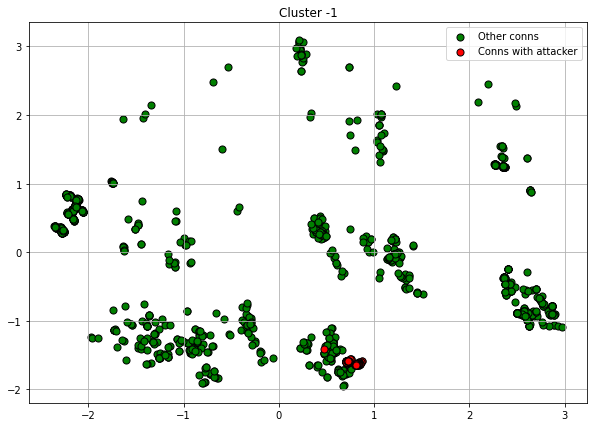

Total num of conns: 1385

Attacker conns ratio:
No     1158
Yes     227
Name: attacker_label, dtype: int64

IPs:
192.168.10.50    286
172.16.0.1       227
192.168.10.25    164
192.168.10.16    153
192.168.10.19     90
192.168.10.12     81
192.168.10.17     74
192.168.10.15     68
192.168.10.14     52
192.168.10.51     46
192.168.10.3      41
192.168.10.5      38
192.168.10.8      38
192.168.10.9      26
192.168.10.1       1
Name: originated_ip, dtype: int64

192.168.10.50      429
192.168.10.3       426
192.168.10.255      68
162.213.33.50       32
17.253.14.125       28
                  ... 
192.168.10.16        1
52.14.71.61          1
192.168.10.51        1
144.217.163.175      1
104.25.163.34        1
Name: responded_ip, Length: 159, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.79568Z
timestamp max = 2017-07-07T17:04:58.735517Z

Cluster -1 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
3241   C5WEhV3TNsR2uNlKQc            0.00000    172.16.0.1           0.74686   
19385   C5pRRrQSFRQUXzn2k            0.00000    172.16.0.1           0.74686   
11256  CT1zw34eNj3sCx60T3            0.00000    172.16.0.1           0.74686   
18957  CkeIyz2B5Cb3yZFxs8            0.00000    172.16.0.1           0.74686   
11682  CIjyjM21ln6riJZhYl            0.00000    172.16.0.1           0.74686   
20223  CNe1kO2sw7Q4AHSLEj            0.00000    172.16.0.1           0.74686   
20063  CHCnyV3rYoWb82WWdl            0.00000    172.16.0.1           0.74686   
8002   CkxGZI1p3stcGCJE64            0.00000    172.16.0.1           0.74686   
5618   Ck7aMS2OW0vPjrzxBd            0.00000    172.16.0.1           0.74686   
5500   CRAlvn2jgBauWBiUil            0.00000    172.16.0.1           0.74686   
17075   C3Yh674aOySc7XPMA            0.00000    172.16.0.1           0.74686   
987     C7yGDuT3bGshEmiM6            0.00000    172.16.0.1           0.74686   
7250   CnJuJ51MBKXh3tNoSj            0.00000    172.16.0.1           0.74686   
11729   CptZaiWVq4F9zCZDk            0.00000    172.16.0.1           0.74686   
108    C7WDWr38oiJqqMdvm1            0.00000    172.16.0.1           0.74686   

        responded_ip                    timestamp  connection.time  duration  \
3241   192.168.10.50  2017-07-07T16:59:40.938343Z          0.82332   0.00012   
19385  192.168.10.50  2017-07-07T16:59:50.786329Z          0.82880   0.00012   
11256  192.168.10.50  2017-07-07T17:00:25.830688Z          0.84828   0.00070   
18957  192.168.10.50  2017-07-07T17:00:34.815393Z          0.85327   0.00066   
11682  192.168.10.50   2017-07-07T16:56:02.43423Z          0.70184   0.00078   
20223  192.168.10.50  2017-07-07T16:55:46.821577Z          0.69316   0.00060   
20063  192.168.10.50  2017-07-07T17:00:15.046419Z          0.84228   0.00066   
8002   192.168.10.50  2017-07-07T16:59:58.690164Z          0.83319   0.00010   
5618   192.168.10.50   2017-07-07T16:59:06.43504Z          0.80414   0.00062   
5500   192.168.10.50  2017-07-07T16:55:55.417015Z          0.69794   0.00012   
17075  192.168.10.50  2017-07-07T16:55:40.453686Z          0.68962   0.00063   
987    192.168.10.50  2017-07-07T16:56:46.733088Z          0.72647   0.00070   
7250   192.168.10.50  2017-07-07T16:58:59.381702Z          0.80022   0.00012   
11729  192.168.10.50  2017-07-07T16:59:52.535629Z          0.82977   0.00058   
108    192.168.10.50  2017-07-07T16:56:39.617328Z          0.72252   0.00078   

       connection.duration protocol service conn_state  connection.orig_p  \
3241               0.00000      tcp    none        REJ            0.61801   
19385              0.00000      tcp    none        REJ            0.74089   
11256              0.00000      tcp    none       RSTO            0.52041   
18957              0.00000      tcp    none       RSTO            0.64408   
11682              0.00000      tcp    none       RSTO            0.74873   
20223              0.00000      tcp    none       RSTO            0.87948   
20063              0.00000      tcp    none       RSTO            0.63770   
8002               0.00000      tcp    none        REJ            0.83174   
5618               0.00000      tcp    none       RSTO            0.76078   
5500               0.00000      tcp    none        REJ            0.58063   
17075              0.00000      tcp    none       RSTO            0.96460   
987                0.00000      tcp    none       RSTO            0.86420   
7250               0.00000      tcp    none        REJ            0.66349   
11729              0.00000      tcp    none       RSTO            0.51922   
108                0.00000      tcp    none       RSTO            0.70239   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
3241    40502  orig_reg_or_dyn                0.00000        0   
19385   48554  orig_reg_or_dyn                0.00000        0   
11256   34106  orig_reg_or_dy

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
10916  CBEtk737fH8IxkILzc            1.00000  192.168.10.25           0.74686   
3089   Cwy5o32GKJlhT2vqzg            1.00000  192.168.10.12           0.07190   
1527   CiFiIq3QqHHJIgFZ6i            1.00000  192.168.10.25           0.74394   
9750   CDgN9E1EUF2lK8HAO6            1.00000  192.168.10.50           0.74686   
12471  C7aFl03wPr1a7QmGWa            1.00000  192.168.10.12           0.07212   
1210   CYgLY73fZiech4SI5c            1.00000  192.168.10.25           0.67134   
7377   C45fj31bmnao5aZ8d8            1.00000  192.168.10.15           0.39395   
6674   C00Jw34Oc6fRp646D8            1.00000  192.168.10.16           0.26502   
15413  CmGyJE1j85YCxdfU11            1.00000  192.168.10.25           0.39282   
4252   CUzAQz1A574LKnpjwi            1.00000   192.168.10.8           0.74686   
14835  CSbkW42FHI8ZPs7ilc            1.00000  192.168.10.19           0.16437   
5594   C8qv8A3jJtvygdMnE3            1.00000  192.168.10.19           0.74686   
20497    CWxqdBpJ2VNijShy            1.00000  192.168.10.16           0.69228   
4687    C7oqOIl7bBMs0cBic            1.00000  192.168.10.50           0.74686   
16291   CGzF5A4meF50iN6gY            1.00000  192.168.10.50           0.74686   

         responded_ip                    timestamp  connection.time  duration  \
10916    192.168.10.3  2017-07-07T16:45:19.683542Z          0.34451 105.65635   
3089   23.194.141.182   2017-07-07T16:37:25.57897Z          0.08093 116.46920   
1527    191.237.24.89  2017-07-07T16:35:03.189755Z          0.00177   0.04661   
9750     192.168.10.3  2017-07-07T16:55:59.821951Z          0.70039   0.00076   
12471   23.208.77.199  2017-07-07T16:37:25.691199Z          0.08099 115.35811   
1210   173.194.68.154  2017-07-07T16:35:59.654906Z          0.03316   0.05018   
7377   104.88.108.162  2017-07-07T16:39:28.025595Z          0.14901 115.74215   
6674      72.21.91.29  2017-07-07T16:55:50.653738Z          0.69530 173.54543   
15413  104.16.161.133   2017-07-07T16:35:59.65674Z          0.03316   0.01533   
4252    192.168.10.50   2017-07-07T16:51:52.45938Z          0.56287   1.59064   
14835  46.229.174.117  2017-07-07T16:42:04.179722Z          0.23582   3.00164   
5594    192.168.10.50  2017-07-07T16:35:56.658141Z          0.03150   1.33198   
20497    178.255.83.1  2017-07-07T16:56:38.382473Z          0.72183   0.92714   
4687     192.168.10.3   2017-07-07T16:55:28.01587Z          0.68271   0.00017   
16291    192.168.10.3  2017-07-07T16:43:22.571857Z          0.27940   0.00022   

       connection.duration protocol service conn_state  connection.orig_p  \
10916              0.11819      tcp    none       RSTR            0.80533   
3089               0.13029      tcp     ssl       RSTR            0.90804   
1527               0.00005      tcp    none         SF            0.80138   
9750               0.00000      udp     krb         SF            0.77980   
12471              0.12905      tcp     ssl       RSTR            0.81197   
1210               0.00006      tcp    none         SF            0.80212   
7377               0.12948      tcp     ssl       RSTR            0.83562   
6674               0.19414      tcp    http         SF            0.86937   
15413              0.00002      tcp    none         SF            0.80153   
4252               0.00178      tcp    none         SF            0.08614   
14835              0.00336      tcp    none         S0            0.87104   
5594               0.00149      tcp     ssh         SF            0.51231   
20497              0.00104      tcp    http         SF            0.91424   
4687               0.00000      udp     dns         SF            0.53157   
16291              0.00000      udp     dns         SF            0.95617   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
10916   52777  orig_reg_or_dyn                0.00368     1493   
3089    59508  orig_reg_or_dyn                0.00954     3877 

Protocol:
tcp     789
udp     594
icmp      2
Name: protocol, dtype: int64

Service:
none                  505
dns                   391
ntp                   126
ssl                    85
http                   71
ssh                    65
ftp-data               36
ftp                    36
krb                    30
krb_tcp                10
gssapi,dce_rpc,smb     10
dce_rpc                 9
gssapi,krb,smb          8
gssapi,ntlm,smb         2
smb                     1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1153
orig_well_known     232
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_well_known    301
resp_443           267
resp_53            259
resp_80            147
resp_123           126
resp_22            108
resp_21             78
resp_reg            77
resp_dyn            22
Name: resp_p_cat, dtype: int64




Total num of conns: 3012

Attacker conns ratio:
No    3012
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    3012
Name: originated_ip, dtype: int64

192.168.10.1    3012
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.013517Z
timestamp max = 2017-07-07T17:04:50.475601Z

Cluster 1 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
1290   CnxJPv4hdzE0g5kJ3e            1.00000  192.168.10.3           0.74686   
14834  Cq8uEa2jJhuKx8dvR4            1.00000  192.168.10.3           0.74686   
606    C8ueur2ucUjAG3hYHk            1.00000  192.168.10.3           0.74686   
2943   CMIViH3aVCSVdxOO4g            1.00000  192.168.10.3           0.74686   
16323  CLby7J38YKneTLD712            1.00000  192.168.10.3           0.74686   
15190  CQvFUr2lAZ3M5DjCEi            1.00000  192.168.10.3           0.74686   
1578   CGqarn150zGrus1nnf            1.00000  192.168.10.3           0.74686   
13178   CaKQKtta7LjYaV7al            1.00000  192.168.10.3           0.74686   
14404  Cu3WMu2runcCPusbAi            1.00000  192.168.10.3           0.74686   
20693  Cf5db54R4HeNePyMda            1.00000  192.168.10.3           0.74686   
4948   CXeODu3RBBQrya3tt1            1.00000  192.168.10.3           0.74686   
277     C9f3ek3J3bt6TBiPf            1.00000  192.168.10.3           0.74686   
6337   CGZI6d13eMKXlTcq6a            1.00000  192.168.10.3           0.74686   
13439  ClvNyF2fUkkt6f9pZc            1.00000  192.168.10.3           0.74686   
1522   Cz5Fmk2Pme6KAGrgFa            1.00000  192.168.10.3           0.74686   

       responded_ip                    timestamp  connection.time  duration  \
1290   192.168.10.1  2017-07-07T16:59:54.736924Z          0.83099   0.20525   
14834  192.168.10.1  2017-07-07T16:47:15.831441Z          0.40908   0.02348   
606    192.168.10.1   2017-07-07T16:39:30.47662Z          0.15037   0.02423   
2943   192.168.10.1  2017-07-07T16:35:49.635793Z          0.02759   0.02367   
16323  192.168.10.1  2017-07-07T16:46:44.840871Z          0.39185   0.00055   
15190  192.168.10.1  2017-07-07T16:42:31.775474Z          0.25116   0.03152   
1578   192.168.10.1  2017-07-07T17:04:36.557864Z          0.98767   0.03061   
13178  192.168.10.1  2017-07-07T16:59:50.748653Z          0.82878   0.05418   
14404  192.168.10.1  2017-07-07T16:42:33.617246Z          0.25219   0.03053   
20693  192.168.10.1   2017-07-07T16:59:18.65708Z          0.81093   0.00036   
4948   192.168.10.1  2017-07-07T16:35:51.298155Z          0.02852   0.06053   
277    192.168.10.1  2017-07-07T16:35:47.588346Z          0.02645   0.08225   
6337   192.168.10.1  2017-07-07T16:46:10.672884Z          0.37286   0.03074   
13439  192.168.10.1  2017-07-07T16:35:26.771015Z          0.01488   0.03052   
1522   192.168.10.1  2017-07-07T16:46:22.993227Z          0.37971   0.15114   

       connection.duration protocol service conn_state  connection.orig_p  \
1290               0.00023      udp     dns         SF            0.92053   
14834              0.00003      udp     dns         SF            0.92399   
606                0.00003      udp     dns         SF            0.93058   
2943               0.00003      udp     dns         SF            0.95140   
16323              0.00000      udp     dns         SF            0.91694   
15190              0.00004      udp     dns         SF            0.94293   
1578               0.00003      udp     dns         SF            0.92704   
13178              0.00006      udp     dns         SF            0.92124   
14404              0.00003      udp     dns         SF            0.92304   
20693              0.00000      udp     dns         SF            0.93255   
4948               0.00007      udp     dns         SF            0.93943   
277                0.00009      udp     dns         SF            0.92892   
6337               0.00003      udp     dns         SF            0.95277   
13439              0.00003      udp     dns         SF            0.91674   
1522               0.00017      udp     dns         SF            0.93669   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
1290    60326  orig_reg_or_dyn                0.00015       61   
14834   60553  orig_reg_or_dyn                0.00016       64   
606     60985  orig_reg_or_dyn               

Protocol:
udp    3012
Name: protocol, dtype: int64

Service:
dns    3012
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3012
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    3012
Name: resp_p_cat, dtype: int64




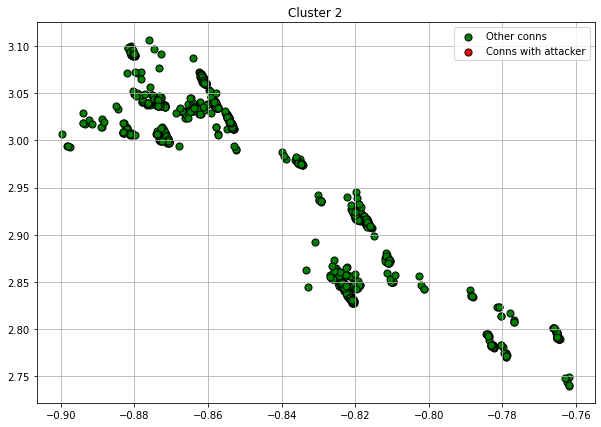

Total num of conns: 1013

Attacker conns ratio:
No    1013
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    1013
Name: originated_ip, dtype: int64

192.168.10.1    1013
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:47:59.699027Z
timestamp max = 2017-07-07T16:57:47.380738Z

Cluster 2 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
9830   Cwr0vq1CbQ0BEYyDAg            1.00000  192.168.10.3           0.74686   
4696    C1Gl9YMQdcsi8UmJ5            1.00000  192.168.10.3           0.74686   
15090  CxagP711I6DnUIBtAa            1.00000  192.168.10.3           0.74686   
14008  CZTTOY2rZLiY9dLpRh            1.00000  192.168.10.3           0.74686   
5867   CMpwOA4NKKpUONcVaj            1.00000  192.168.10.3           0.74686   
19257  Cw6GD71pqUj0xCf7b9            1.00000  192.168.10.3           0.74686   
1647   CMEob91nIJSHghG1pf            1.00000  192.168.10.3           0.74686   
5316   CseGT73YqyWiN10up2            1.00000  192.168.10.3           0.74686   
74      Cwd0JwP5gzZOZ2VP5            1.00000  192.168.10.3           0.74686   
3427    Cbqc4SVmC0AidTeEk            1.00000  192.168.10.3           0.74686   
15374   CWVtxeGo9wDG5mNOj            1.00000  192.168.10.3           0.74686   
12625  CynKBv3t6QHEWTxm53            1.00000  192.168.10.3           0.74686   
17029  CsTQ1Z2AAaEq2VB58g            1.00000  192.168.10.3           0.74686   
19014  CeZsjw2HTp0GelWhYk            1.00000  192.168.10.3           0.74686   
16186  CaJOtu1uCNbfMtbIg1            1.00000  192.168.10.3           0.74686   

       responded_ip                    timestamp  connection.time  duration  \
9830   192.168.10.1   2017-07-07T16:51:05.61871Z          0.53683   0.03050   
4696   192.168.10.1   2017-07-07T16:56:24.91729Z          0.71434   0.06099   
15090  192.168.10.1  2017-07-07T16:49:34.219558Z          0.48602   0.03087   
14008  192.168.10.1  2017-07-07T16:53:28.155948Z          0.61607   0.03208   
5867   192.168.10.1  2017-07-07T16:53:02.241917Z          0.60167   0.00046   
19257  192.168.10.1  2017-07-07T16:48:24.296008Z          0.44714   0.06275   
1647   192.168.10.1  2017-07-07T16:48:23.755204Z          0.44684   0.03098   
5316   192.168.10.1  2017-07-07T16:56:36.035371Z          0.72053   0.03053   
74     192.168.10.1  2017-07-07T16:56:35.313921Z          0.72012   0.03117   
3427   192.168.10.1  2017-07-07T16:57:18.391627Z          0.74407   0.03138   
15374  192.168.10.1  2017-07-07T16:54:57.595453Z          0.66580   0.03917   
12625  192.168.10.1  2017-07-07T16:50:45.140134Z          0.52545   0.07647   
17029  192.168.10.1  2017-07-07T16:53:02.257987Z          0.60168   0.09595   
19014  192.168.10.1  2017-07-07T16:48:24.493897Z          0.44725   0.03081   
16186  192.168.10.1   2017-07-07T16:54:40.41623Z          0.65625   0.03067   

       connection.duration protocol service conn_state  connection.orig_p  \
9830               0.00003      udp     dns         SF            0.92306   
4696               0.00007      udp     dns         SF            0.92759   
15090              0.00003      udp     dns         SF            0.91700   
14008              0.00004      udp     dns         SF            0.92867   
5867               0.00000      udp     dns         SF            0.91705   
19257              0.00007      udp     dns         SF            0.93222   
1647               0.00003      udp     dns         SF            0.95152   
5316               0.00003      udp     dns         SF            0.91969   
74                 0.00003      udp     dns         SF            0.94746   
3427               0.00004      udp     dns         SF            0.93812   
15374              0.00004      udp     dns         SF            0.94667   
12625              0.00009      udp     dns         SF            0.95364   
17029              0.00011      udp     dns         SF            0.92893   
19014              0.00003      udp     dns         SF            0.92513   
16186              0.00003      udp     dns         SF            0.94340   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
9830    60492  orig_reg_or_dyn                0.00022       89   
4696    60789  orig_reg_or_dyn                0.00011       45   
15090   60095  orig_reg_or_dyn               

Protocol:
udp    1013
Name: protocol, dtype: int64

Service:
dns    1013
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1013
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    1013
Name: resp_p_cat, dtype: int64




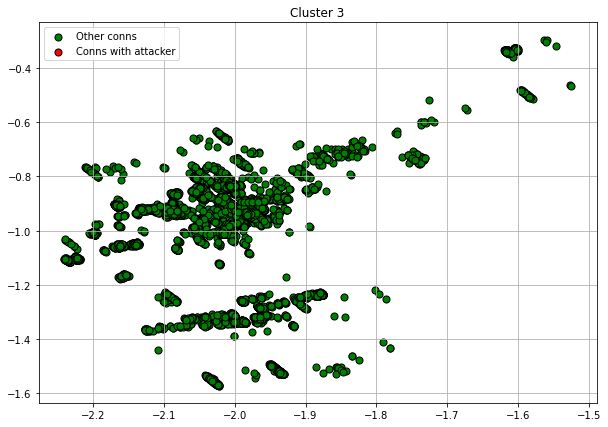

Total num of conns: 8030

Attacker conns ratio:
No    8030
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    3120
192.168.10.15     948
192.168.10.9      786
192.168.10.19     777
192.168.10.5      701
192.168.10.8      665
192.168.10.16     461
192.168.10.17     332
192.168.10.12     162
192.168.10.25      78
Name: originated_ip, dtype: int64

192.168.10.3    8030
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.013671Z
timestamp max = 2017-07-07T17:04:49.817692Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
8052   CuOY2v4M7sjngeY6kb            1.00000  192.168.10.14           0.74686   
5440   CKBYkg1oRUNo4lQl5b            1.00000  192.168.10.14           0.74686   
13184  CpUmHm4dcEeU9qGRHg            1.00000  192.168.10.19           0.74686   
4274   ClX4DV3dx1CruzjD4j            1.00000  192.168.10.15           0.74686   
5334   C0V49g3Hib1tqkFi4a            1.00000  192.168.10.14           0.74686   
2135    C7b5R92AfW1tzRezb            1.00000  192.168.10.14           0.74686   
9386   CVx0m42ysRa3D882xk            1.00000   192.168.10.8           0.74686   
20270  CxQnIR1SmFu7QsiYr3            1.00000  192.168.10.19           0.74686   
8200    COfO4klLryXeeAon2            1.00000   192.168.10.8           0.74686   
11962  CFig2l1jdSYEL5Dnj1            1.00000  192.168.10.25           0.74686   
844    CyNCXs1RBweHtxv0N7            1.00000   192.168.10.5           0.74686   
6530   CsjkNJ3dqos8BEXBwc            1.00000   192.168.10.5           0.74686   
10235   CIrwVCjteGr2Ungac            1.00000  192.168.10.14           0.74686   
3159    CsNlYTZ9mbsT9iR6i            1.00000   192.168.10.5           0.74686   
8509   Cz9yRg34SvD0EFVix5            1.00000   192.168.10.9           0.74686   

       responded_ip                    timestamp  connection.time  duration  \
8052   192.168.10.3  2017-07-07T16:53:04.354032Z          0.60284   0.06060   
5440   192.168.10.3  2017-07-07T16:42:33.204898Z          0.25196   0.03113   
13184  192.168.10.3   2017-07-07T16:36:08.90183Z          0.03830   0.06160   
4274   192.168.10.3  2017-07-07T16:55:02.567163Z          0.66856   0.00018   
5334   192.168.10.3  2017-07-07T17:03:48.929235Z          0.96119   0.03130   
2135   192.168.10.3  2017-07-07T16:42:33.953416Z          0.25237   0.09941   
9386   192.168.10.3  2017-07-07T16:36:54.306989Z          0.06355   0.00014   
20270  192.168.10.3  2017-07-07T16:36:18.101197Z          0.04342   0.02383   
8200   192.168.10.3  2017-07-07T16:53:28.154958Z          0.61607   0.00020   
11962  192.168.10.3  2017-07-07T16:36:57.805597Z          0.06549   0.05430   
844    192.168.10.3  2017-07-07T16:35:24.715863Z          0.01374   0.00015   
6530   192.168.10.3  2017-07-07T16:35:22.028349Z          0.01224   0.00016   
10235  192.168.10.3  2017-07-07T16:40:38.597372Z          0.18824   0.00021   
3159   192.168.10.3  2017-07-07T16:50:53.767412Z          0.53024   0.00076   
8509   192.168.10.3    2017-07-07T16:48:23.9634Z          0.44696   0.00015   

       connection.duration protocol service conn_state  connection.orig_p  \
8052               0.00007      udp     dns         SF            0.97098   
5440               0.00003      udp     dns         SF            0.89758   
13184              0.00007      udp     dns         SF            0.47745   
4274               0.00000      udp     dns         SF            0.76997   
5334               0.00004      udp     dns         SF            0.86448   
2135               0.00011      udp     dns         SF            0.95723   
9386               0.00000      udp     dns         SF            0.91415   
20270              0.00003      udp     dns         SF            0.21715   
8200               0.00000      udp     dns         SF            0.95610   
11962              0.00006      udp     dns         SF            0.94839   
844                0.00000      udp     dns         SF            0.92654   
6530               0.00000      udp     dns         SF            0.95846   
10235              0.00000      udp     dns         SF            0.98228   
3159               0.00000      udp     dns         SF            0.76368   
8509               0.00000      udp     dns         SF            0.98538   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
8052    63632  orig_reg_or_dyn                0.00044      180   
5440    58822  orig_reg_or_dyn                0.00048      196   
13184   31291  orig_reg_or_dy

Protocol:
udp    8030
Name: protocol, dtype: int64

Service:
dns    8030
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8030
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    8030
Name: resp_p_cat, dtype: int64




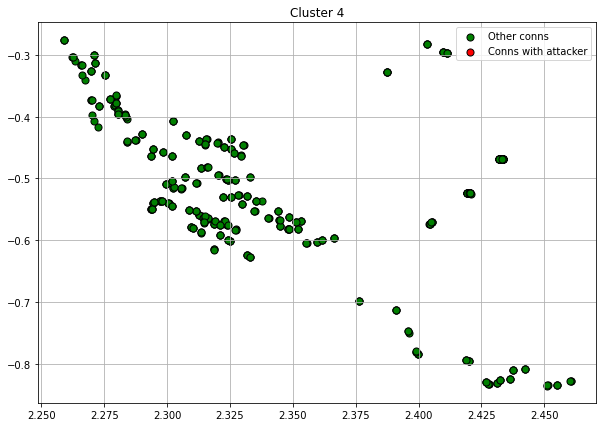

Total num of conns: 431

Attacker conns ratio:
No    431
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    107
192.168.10.8     105
192.168.10.14     81
192.168.10.5      72
192.168.10.9      51
192.168.10.12     11
192.168.10.25      4
Name: originated_ip, dtype: int64

205.174.165.73     357
210.140.236.12      16
210.140.236.11      13
210.140.236.10      12
198.105.254.11      12
198.105.244.11       9
146.186.157.6        8
151.101.64.204       1
151.101.192.204      1
151.101.0.204        1
151.101.128.204      1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:11.719444Z
timestamp max = 2017-07-07T17:03:51.75584Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
2232   CfMUUa2ORgEvxzWot2            1.00000  192.168.10.14           0.79892   
16946  CxlXhE117qVuHoXI0e            1.00000   192.168.10.8           0.79892   
10620  CQcLG31AAPA9yDwjya            1.00000   192.168.10.8           0.79892   
11088   CZjgPy3IQ2E1yIOdK            1.00000  192.168.10.15           0.79892   
16627  Cji4PY2bNpBKTjhXJa            1.00000   192.168.10.9           0.79892   
15615   CGnXHbFdBPGjA204k            1.00000   192.168.10.8           0.79892   
3578   Ci65jA30vFOOoxNim9            1.00000   192.168.10.8           0.79892   
17764  CzXw8S37kovzAhEI38            1.00000  192.168.10.15           0.79892   
7716    C1FYVxWjzMJQPYg64            1.00000   192.168.10.8           0.79892   
18978   CXmNdN35LaIPD5gBc            1.00000   192.168.10.8           0.79892   
14442  CbZhE22qHZ4oxrD7W4            1.00000   192.168.10.5           0.76987   
16012  Crp0n24smhRhVHHXJg            1.00000  192.168.10.15           0.79892   
1146   Ccwvh03j5WuCDN7xM2            1.00000   192.168.10.5           0.76987   
10082  CmxA2b1pGY3tD76NYk            1.00000  192.168.10.15           0.79892   
3070    C26cKyEZFiUPzlId8            1.00000   192.168.10.5           0.76987   

         responded_ip                    timestamp  connection.time  duration  \
2232   205.174.165.73  2017-07-07T16:43:19.983176Z          0.27796   0.00065   
16946  205.174.165.73  2017-07-07T17:00:29.748424Z          0.85046   0.00064   
10620  205.174.165.73  2017-07-07T16:53:19.491351Z          0.61126   0.00069   
11088  205.174.165.73  2017-07-07T16:53:43.517018Z          0.62461   0.00042   
16627  205.174.165.73  2017-07-07T17:00:11.970804Z          0.84057   0.00080   
15615  205.174.165.73   2017-07-07T16:41:32.45516Z          0.21818   0.00057   
3578   205.174.165.73  2017-07-07T16:43:38.696475Z          0.28837   0.00049   
17764  205.174.165.73  2017-07-07T17:01:43.789842Z          0.89162   0.00087   
7716   205.174.165.73  2017-07-07T16:57:06.731924Z          0.73759   0.00071   
18978  205.174.165.73  2017-07-07T16:38:10.439144Z          0.10587   0.00048   
14442  198.105.244.11  2017-07-07T16:50:48.002978Z          0.52704   0.03185   
16012  205.174.165.73  2017-07-07T16:51:37.657818Z          0.55464   0.00049   
1146   198.105.244.11  2017-07-07T16:50:53.563412Z          0.53013   0.03185   
10082  205.174.165.73  2017-07-07T16:41:56.853617Z          0.23175   0.00046   
3070   198.105.244.11  2017-07-07T16:50:54.110289Z          0.53043   0.03191   

       connection.duration protocol service conn_state  connection.orig_p  \
2232               0.00000      tcp    none        REJ            0.84409   
16946              0.00000      tcp    none        REJ            0.08797   
10620              0.00000      tcp    none        REJ            0.08642   
11088              0.00000      tcp    none        REJ            0.84211   
16627              0.00000      tcp    none        REJ            0.11530   
15615              0.00000      tcp    none        REJ            0.08362   
3578               0.00000      tcp    none        REJ            0.08466   
17764              0.00000      tcp    none        REJ            0.84557   
7716               0.00000      tcp    none        REJ            0.08721   
18978              0.00000      tcp    none        REJ            0.08321   
14442              0.00004      tcp    none        REJ            0.81177   
16012              0.00000      tcp    none        REJ            0.84195   
1146               0.00004      tcp    none        REJ            0.81189   
10082              0.00000      tcp    none        REJ            0.83739   
3070               0.00004      tcp    none        REJ            0.81189   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2232    55317  orig_reg_or_dyn                0.00000        0   
16946    5768  orig_reg_or_dyn                0.00000        0 

Protocol:
tcp    431
Name: protocol, dtype: int64

Service:
none    431
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    431
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_reg    357
resp_443     74
Name: resp_p_cat, dtype: int64




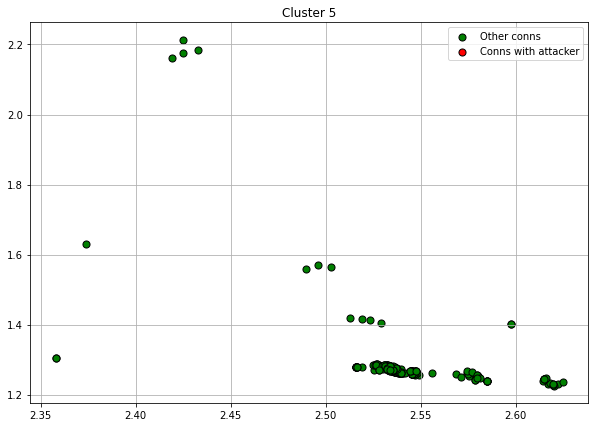

Total num of conns: 312

Attacker conns ratio:
No    312
Name: attacker_label, dtype: int64

IPs:
192.168.10.16    298
192.168.10.12      6
192.168.10.3       4
192.168.10.17      3
192.168.10.19      1
Name: originated_ip, dtype: int64

69.172.216.111     37
69.172.216.55      15
31.13.71.2         13
69.172.216.56      10
23.194.141.200      9
                   ..
172.217.11.33       1
173.194.207.154     1
184.73.171.120      1
192.132.33.27       1
65.52.108.254       1
Name: responded_ip, Length: 101, dtype: int64

Time:
timestamp min = 2017-07-07T16:52:06.801003Z
timestamp max = 2017-07-07T17:01:45.909753Z

Cluster 5 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
13464  C3Y6Xj2zmgZL9Yilgd            1.00000  192.168.10.16           0.18800   
14279  CbR75g1FK1VvsptcP7            1.00000  192.168.10.16           0.25539   
12685  CeGcAd45rYRTiAHuRc            1.00000  192.168.10.16           0.25539   
18407   C5NRwmk5wfHt5y49g            1.00000  192.168.10.17           0.66770   
11836  CtVEEB1TFzyT1zsfJ4            1.00000  192.168.10.16           0.25539   
15782  CHZi5N2ZjgKvevsGkl            1.00000  192.168.10.16           0.25539   
10350  CWJUR04vtIEL671LDc            1.00000  192.168.10.16           0.24976   
14922  CSk5WC1uEjcHnRxe0h            1.00000  192.168.10.12           0.42200   
2742   CugLzK2QA6ly1ZHQ3f            1.00000  192.168.10.16           0.25539   
4286   C3JRcC4Y1mAoP7SSfh            1.00000  192.168.10.16           0.39408   
16359   CGrMn40fKXes7HyOf            1.00000  192.168.10.16           0.39408   
5658   CgpF1r4QcdpbUhbILa            1.00000  192.168.10.16           0.10104   
14271   CA80zuKuYxBtkZTp3            1.00000  192.168.10.16           0.66770   
8970    CmAA0g6WAZ2x7pZJ3            1.00000  192.168.10.16           0.66770   
15122  CUBUHD1tV3iBwniJVa            1.00000  192.168.10.16           0.25539   

         responded_ip                    timestamp  connection.time  duration  \
13464   52.207.199.11   2017-07-07T16:56:36.45881Z          0.72076  63.39191   
14279  69.172.216.111   2017-07-07T16:56:11.46714Z          0.70687   5.08938   
12685  69.172.216.111  2017-07-07T16:56:41.356211Z          0.72348   6.04812   
18407  172.217.12.206  2017-07-07T16:53:28.787133Z          0.61643 115.82796   
11836  69.172.216.111  2017-07-07T16:55:56.857097Z          0.69874   0.30431   
15782   69.172.216.56  2017-07-07T16:55:55.971037Z          0.69825   0.68558   
10350   68.67.178.230  2017-07-07T16:57:16.674114Z          0.74312   5.56063   
14922  111.93.223.135  2017-07-07T16:53:56.470389Z          0.63182  90.94129   
2742    69.172.216.55  2017-07-07T16:55:56.285446Z          0.69843   0.51324   
4286      104.97.71.5  2017-07-07T16:55:51.039629Z          0.69551   1.35859   
16359     104.97.71.5  2017-07-07T16:55:51.152389Z          0.69557   1.53115   
5658       31.13.65.7  2017-07-07T16:55:49.847301Z          0.69485 181.39837   
14271   172.217.10.78  2017-07-07T16:55:50.889081Z          0.69543   1.08813   
8970   172.217.12.195  2017-07-07T16:55:52.682878Z          0.69642   1.09641   
15122  69.172.216.111  2017-07-07T16:55:57.892142Z          0.69932   0.99792   

       connection.duration protocol service conn_state  connection.orig_p  \
13464              0.07091      tcp     ssl         SF            0.89980   
14279              0.00569      tcp     ssl         SF            0.60696   
12685              0.00677      tcp     ssl         SF            0.60944   
18407              0.12957      tcp     ssl         SF            0.57904   
11836              0.00034      tcp     ssl         SF            0.60605   
15782              0.00077      tcp     ssl         SF            0.77513   
10350              0.00622      tcp     ssl         SF            0.59088   
14922              0.10173      tcp     ssl       RSTR            0.73777   
2742               0.00057      tcp     ssl         SF            0.78132   
4286               0.00152      tcp     ssl         SF            0.52224   
16359              0.00171      tcp     ssl         SF            0.52252   
5658               0.20292      tcp     ssl       RSTR            0.66413   
14271              0.00122      tcp     ssl         SF            0.51186   
8970               0.00123      tcp     ssl         SF            0.92162   
15122              0.00112      tcp     ssl         SF            0.60669   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
13464   58968  orig_reg_or_dyn                0.00405     1646   
14279   39778  orig_reg_or_dyn                0.00166      674 

Protocol:
tcp    312
Name: protocol, dtype: int64

Service:
ssl     310
none      2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    312
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           311
resp_well_known      1
Name: resp_p_cat, dtype: int64




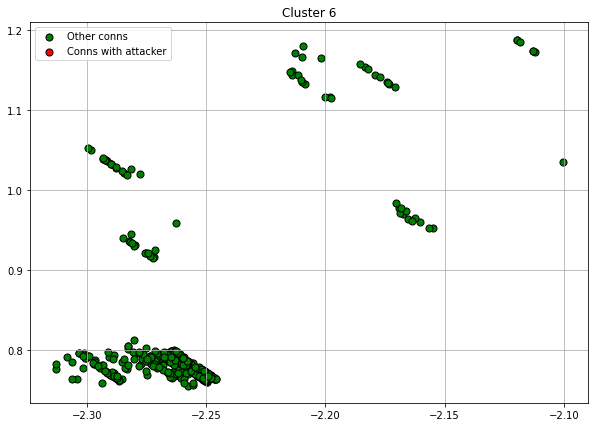

Total num of conns: 410

Attacker conns ratio:
No    410
Name: attacker_label, dtype: int64

IPs:
192.168.10.16    335
192.168.10.19     33
192.168.10.12     28
192.168.10.17     14
Name: originated_ip, dtype: int64

192.168.10.3    410
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:51:48.029168Z
timestamp max = 2017-07-07T16:57:47.294857Z

Cluster 6 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
18250  C3f3sO2W95tu0JnMtl            1.00000  192.168.10.16           0.74686   
1165    CLEntVNOiSWGAIw08            1.00000  192.168.10.16           0.74686   
7619   Clngwc3Bv6Pkrpliq3            1.00000  192.168.10.16           0.74686   
15816  CtLR8a2OkNWo1lNnbb            1.00000  192.168.10.19           0.74686   
992    CdsS3t1m0vrYwvxt1k            1.00000  192.168.10.16           0.74686   
9584   C4pjL51GVOo4xpWNS9            1.00000  192.168.10.16           0.74686   
17642  C5ibT34OIl2GIABjn3            1.00000  192.168.10.16           0.74686   
13944  ClMDkr2LW0orkj94W4            1.00000  192.168.10.16           0.74686   
3727    CjwMSS9kGhsNNzRZ8            1.00000  192.168.10.16           0.74686   
4503   CfSIcb2OonwBoVbJj6            1.00000  192.168.10.16           0.74686   
15969  CzL9hf3OjCsR63KuSd            1.00000  192.168.10.16           0.74686   
15849  C7Aol02yKxBO2zWvvg            1.00000  192.168.10.16           0.74686   
5054    CdQ9tymFfA6Jgp7i3            1.00000  192.168.10.19           0.74686   
3757   C6OSzw3YsfqwdfCHk1            1.00000  192.168.10.16           0.74686   
10576  CWLiY521JF7nB3XFP8            1.00000  192.168.10.16           0.74686   

       responded_ip                    timestamp  connection.time  duration  \
18250  192.168.10.3  2017-07-07T16:55:48.430315Z          0.69406   0.06303   
1165   192.168.10.3   2017-07-07T16:55:50.99248Z          0.69548   0.03110   
7619   192.168.10.3  2017-07-07T16:57:15.165237Z          0.74228   0.03148   
15816  192.168.10.3  2017-07-07T16:52:14.741207Z          0.57526   0.00020   
992    192.168.10.3  2017-07-07T16:56:51.436488Z          0.72909   0.00028   
9584   192.168.10.3  2017-07-07T16:55:54.552233Z          0.69746   0.00029   
17642  192.168.10.3  2017-07-07T16:55:54.408928Z          0.69738   0.03277   
13944  192.168.10.3  2017-07-07T16:55:53.841301Z          0.69707   0.06176   
3727   192.168.10.3  2017-07-07T16:57:17.351588Z          0.74349   0.00028   
4503   192.168.10.3  2017-07-07T16:55:48.430248Z          0.69406   0.06150   
15969  192.168.10.3  2017-07-07T16:55:50.964821Z          0.69547   0.03401   
15849  192.168.10.3  2017-07-07T16:55:50.931755Z          0.69545   0.03175   
5054   192.168.10.3  2017-07-07T16:51:50.556214Z          0.56181   0.03177   
3757   192.168.10.3  2017-07-07T16:55:49.747805Z          0.69479   0.03160   
10576  192.168.10.3   2017-07-07T16:55:47.35453Z          0.69346   0.03141   

       connection.duration protocol service conn_state  connection.orig_p  \
18250              0.00007      udp     dns         SF            0.95886   
1165               0.00003      udp     dns         SF            0.77403   
7619               0.00004      udp     dns         SF            0.59821   
15816              0.00000      udp     dns         SF            0.51887   
992                0.00000      udp     dns         SF            0.71377   
9584               0.00000      udp     dns         SF            0.31646   
17642              0.00004      udp     dns         SF            0.09386   
13944              0.00007      udp     dns         SF            0.40048   
3727               0.00000      udp     dns         SF            0.74473   
4503               0.00007      udp     dns         SF            0.41728   
15969              0.00004      udp     dns         SF            0.60669   
15849              0.00004      udp     dns         SF            0.92793   
5054               0.00004      udp     dns         SF            0.47611   
3757               0.00004      udp     dns         SF            0.38116   
10576              0.00004      udp     dns         SF            0.32343   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
18250   62838  orig_reg_or_dyn                0.00019       76   
1165    50726  orig_reg_or_dyn                0.00014       58   
7619    39204  orig_reg_or_dy

Protocol:
udp    410
Name: protocol, dtype: int64

Service:
dns    410
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    410
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    410
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.76646              0.16341            0.61142   
1              0.58042              0.00000            0.39786   
2              0.90160              0.00003            0.92823   
3              0.44626              0.00003            0.94795   
4              0.03172              0.07286            0.83126   
...                ...                  ...                ...   
20714          0.10091              0.00205            0.77740   
20715          0.01532              0.00000            0.78128   
20716          0.37970              0.01127            0.84941   
20717          0.60237              0.00006            0.80251   
20718          0.34348              0.01332            0.84500   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.03924               0.01536            0.00680   
1                    0.00011               0.00064            0.00077   
2                    0.00015               0.00032            0.00077   
3                    0.00011               0.00032            0.00077   
4                    0.00172               0.00480            0.00680   
...                      ...                   ...                ...   
20714                0.00330               0.00544            0.00714   
20715                0.00016               0.00064            0.00077   
20716                0.00159               0.00512            0.00680   
20717                0.00015               0.00064            0.00077   
20718                0.00302               0.00352            0.00119   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00113               0.00997    0.00000    0.00000   
1                    0.00001               0.00062    1.00000    0.00000   
2                    0.00002               0.00031    1.00000    0.00000   
3                    0.00001               0.00031    1.00000    0.00000   
4                    0.00056               0.00467    0.00000    0.00000   
...                      ...                   ...        ...        ...   
20714                0.00014               0.00686    0.00000    0.00000   
20715                0.00003               0.00062    1.00000    0.00000   
20716                0.00291               0.00623    0.00000    0.00000   
20717                0.00002               0.00062    1.00000    0.00000   
20718                0.00067               0.00343    0.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    1.00000      0.05128                           1   
1         0.00000    0.00000      0.00000                           1   
2         0.00000    0.00000      0.00000                           1   
3         0.00000    0.00000      0.00000                           1   
4         0.00000    1.00000      0.05128                           1   
...           ...        ...          ...                         ...   
20714     0.00000    1.00000      0.00000                           1   
20715     0.00000    0.00000      0.00000                           1   
20716     0.00000    1.00000      0.10256                           1   
20717     0.00000    0.00000      0.00000                           1   
20718     1.00000    0.00000      0.07692                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   0   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
2

In [41]:
from datetime import date

print(PREFIX_PATH + 'dbscan_backup' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'dbscan_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)
df.to_csv(PREFIX_PATH + 'dbscan_df_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/dbscan_backup09_12.csv


## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 1385
Silhouette Coefficient: 0.521


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

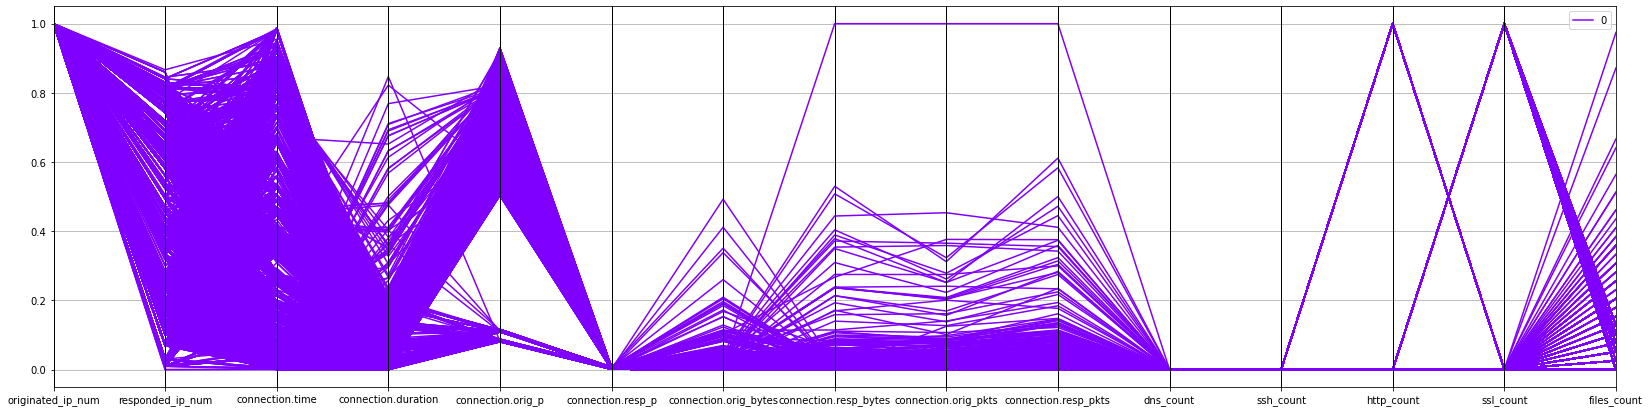

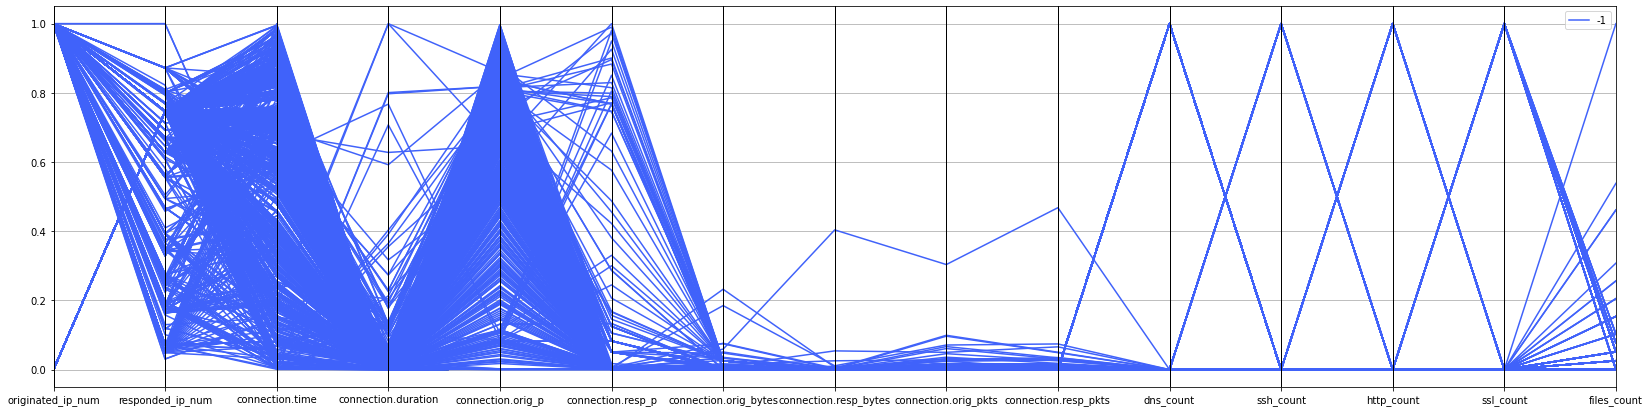

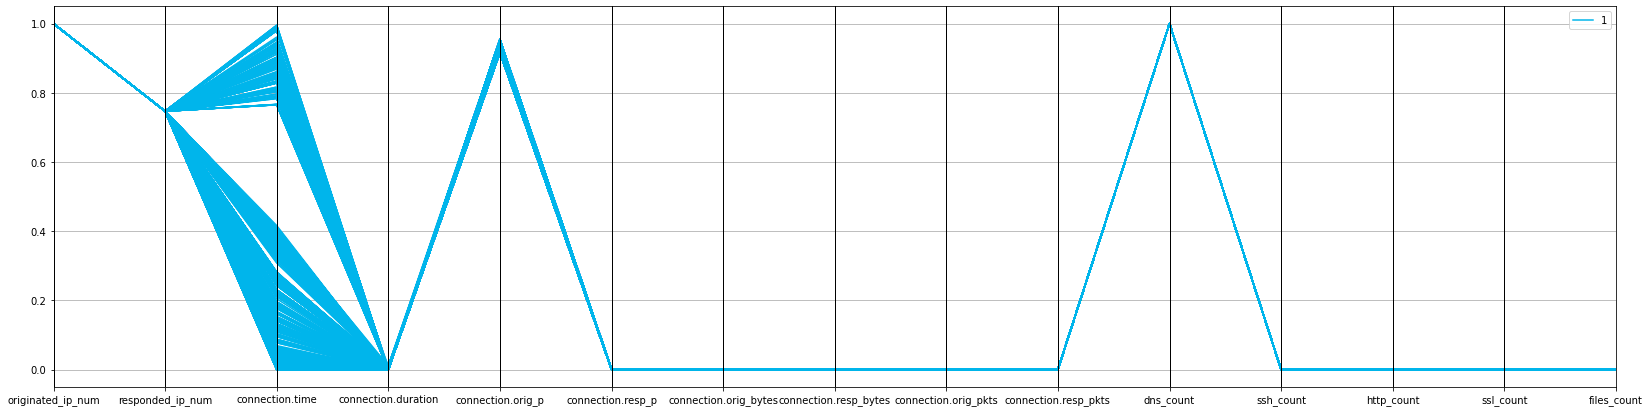

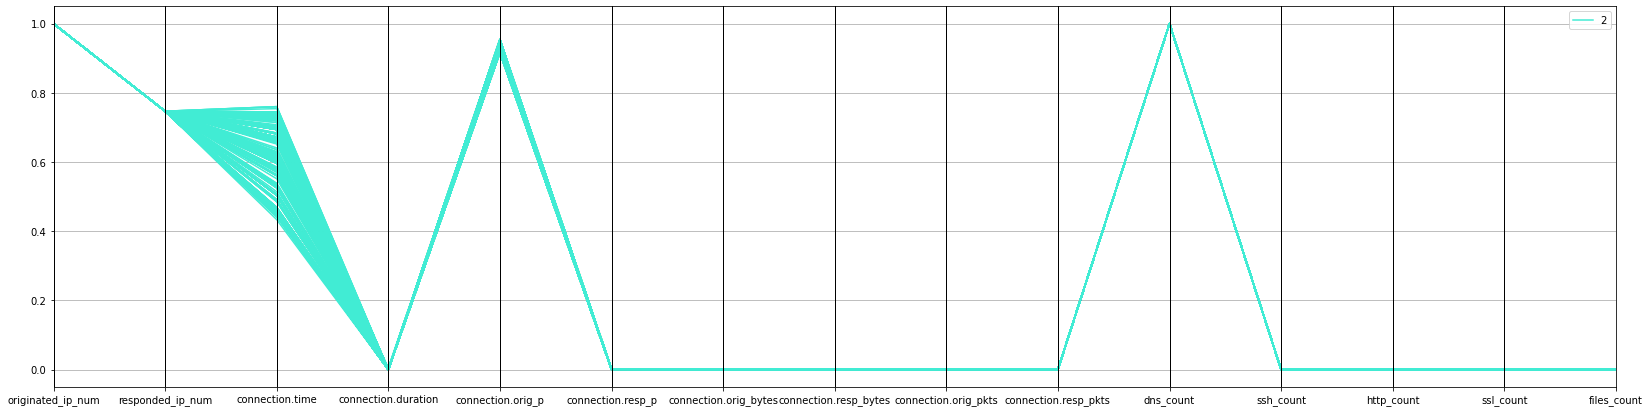

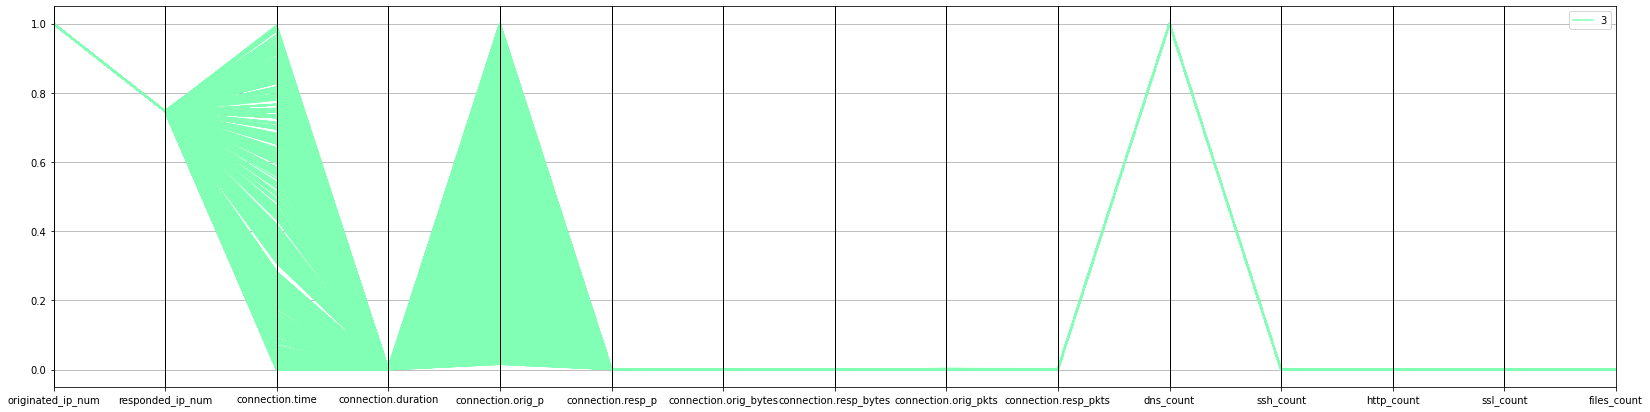

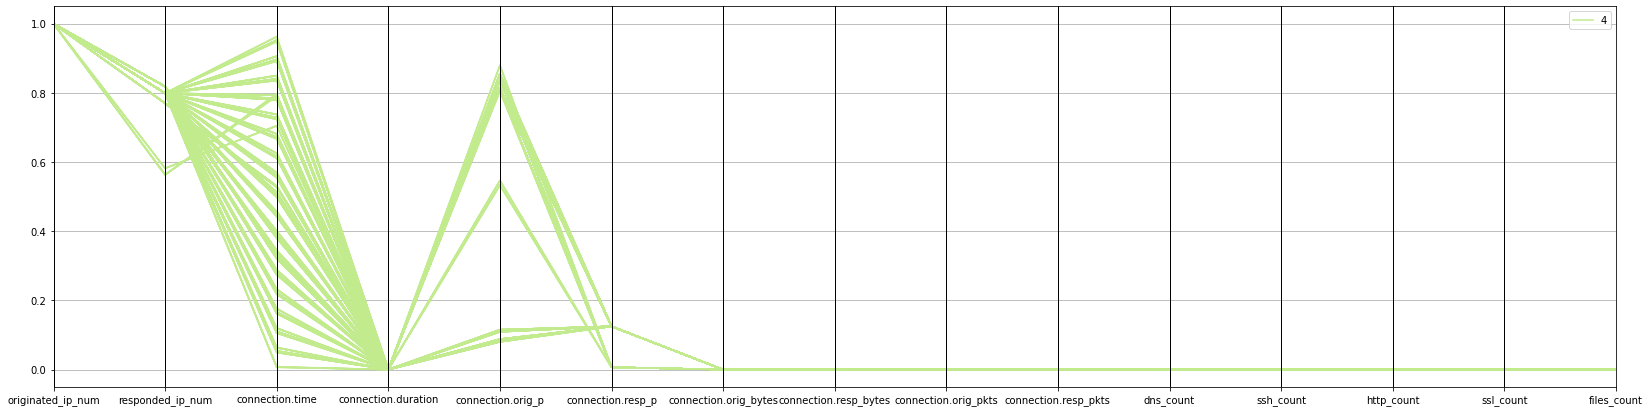

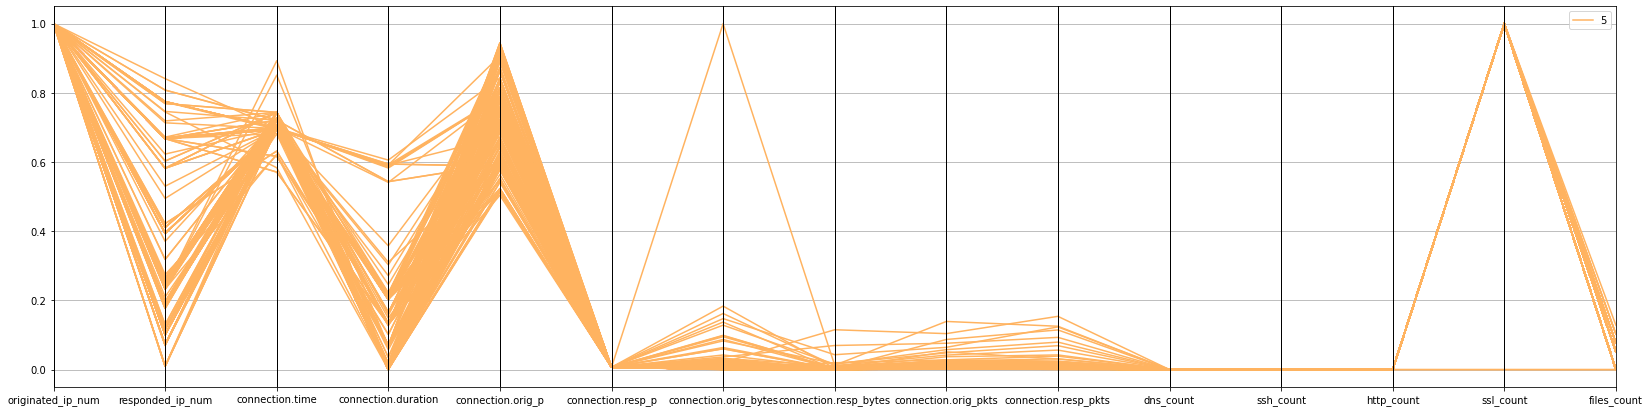

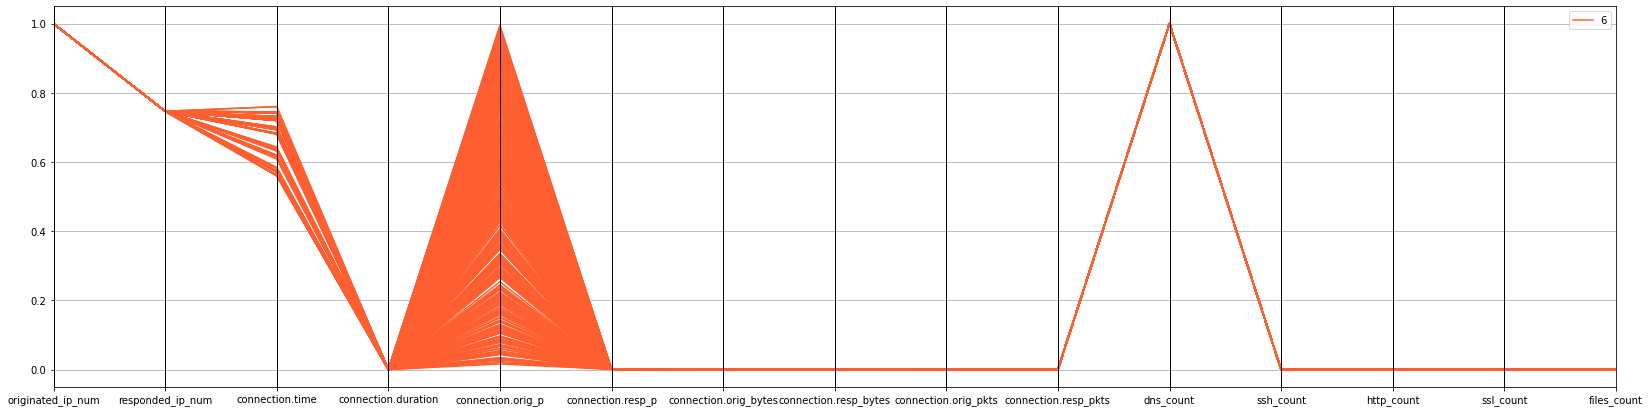

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

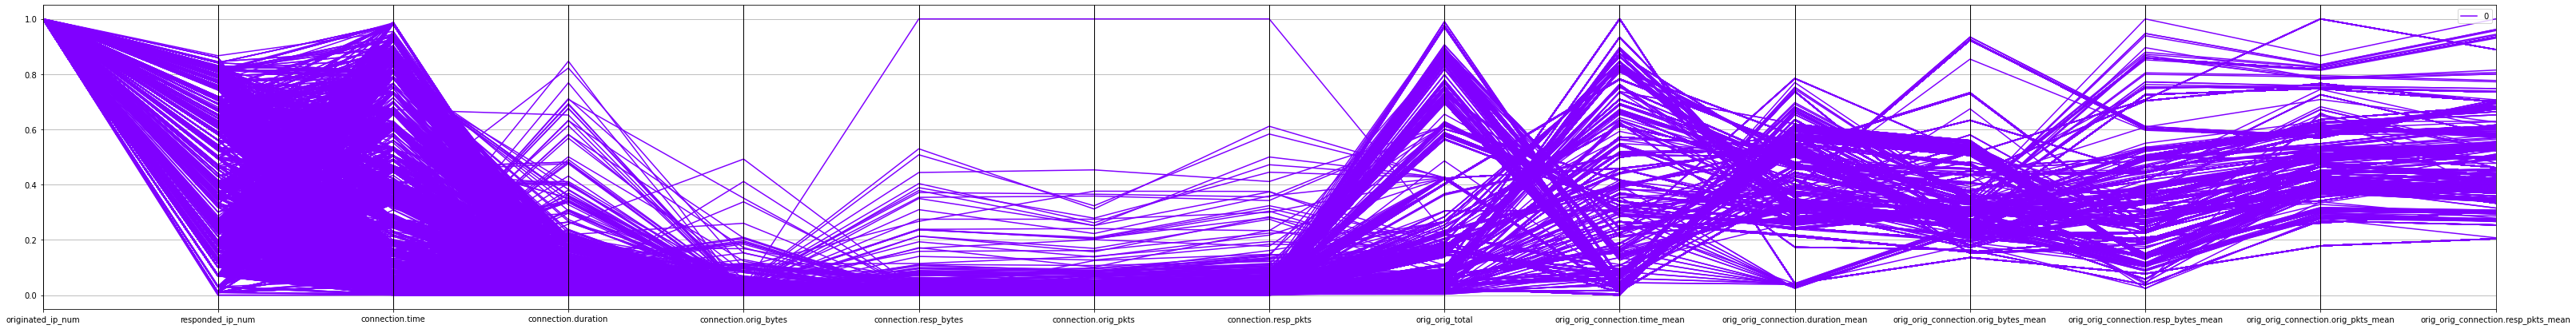

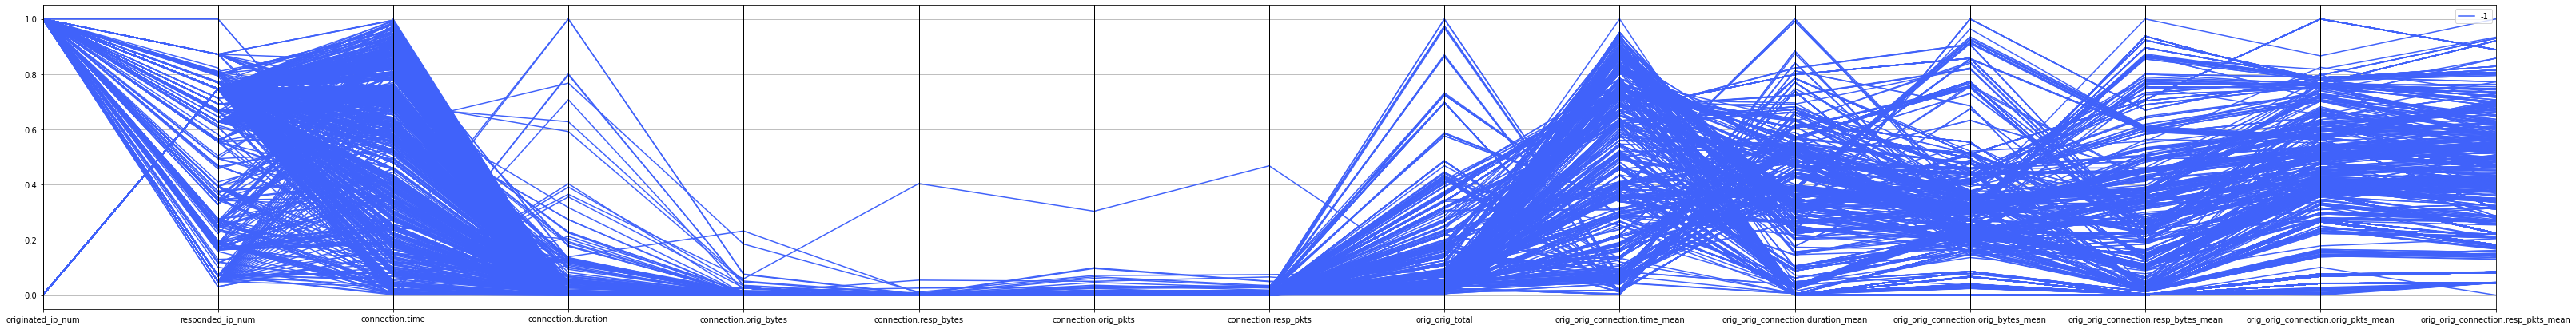

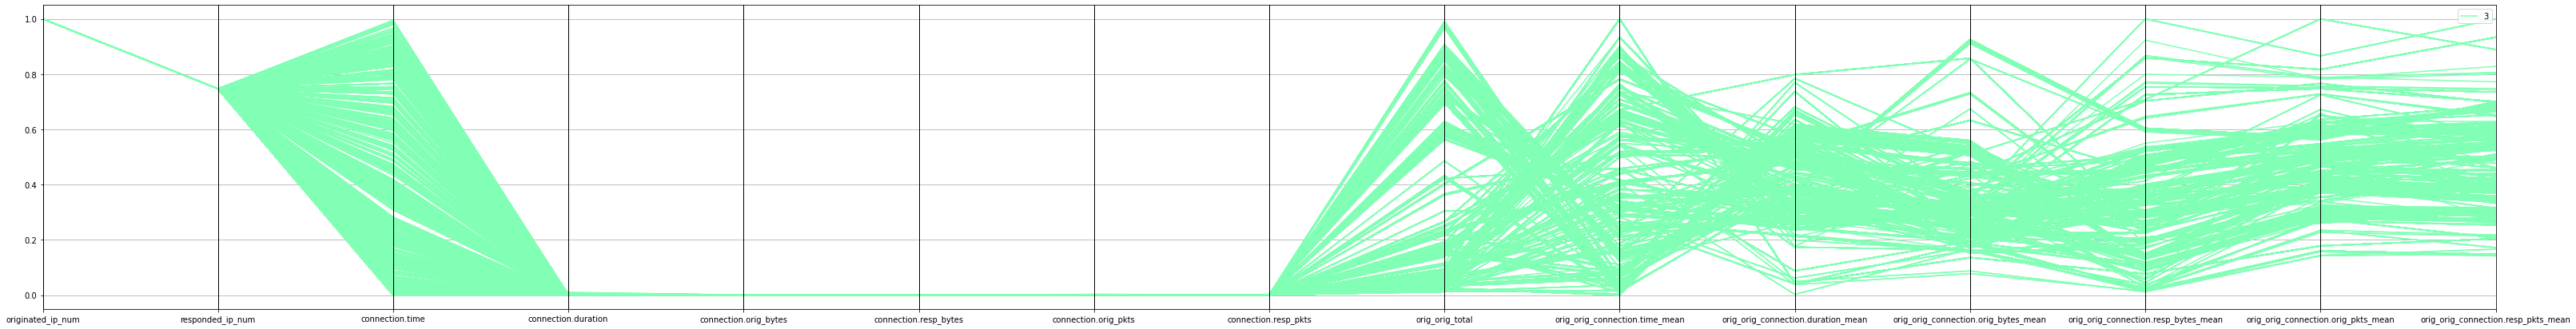

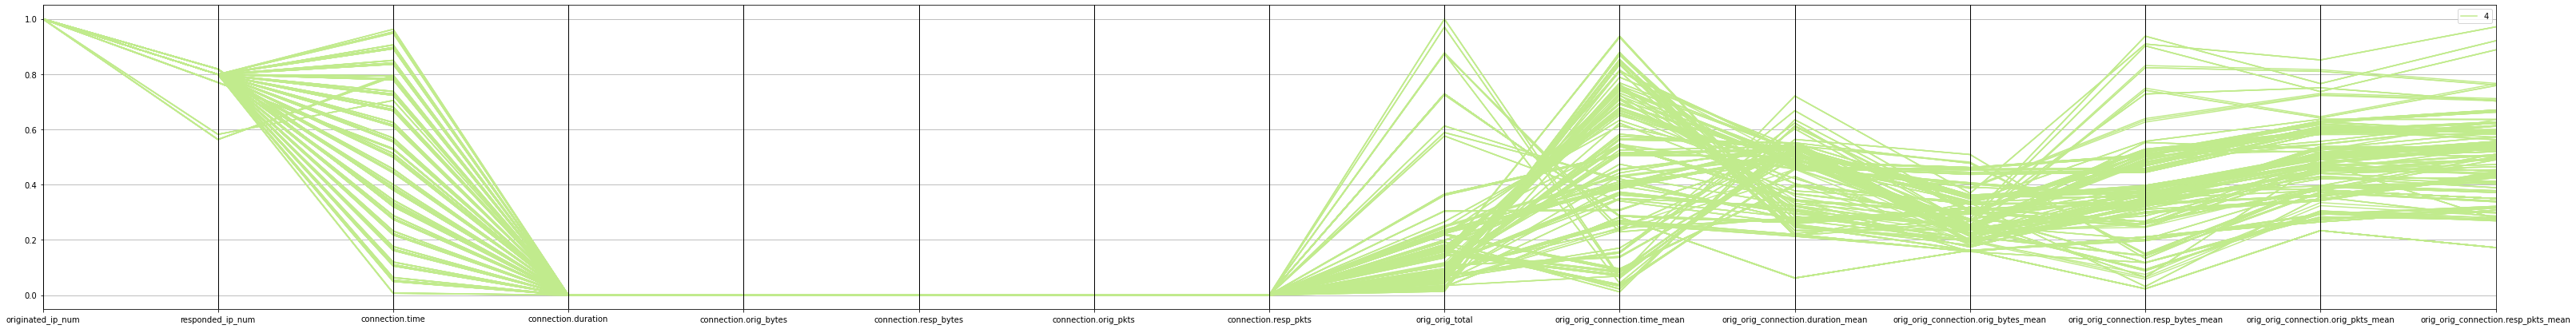

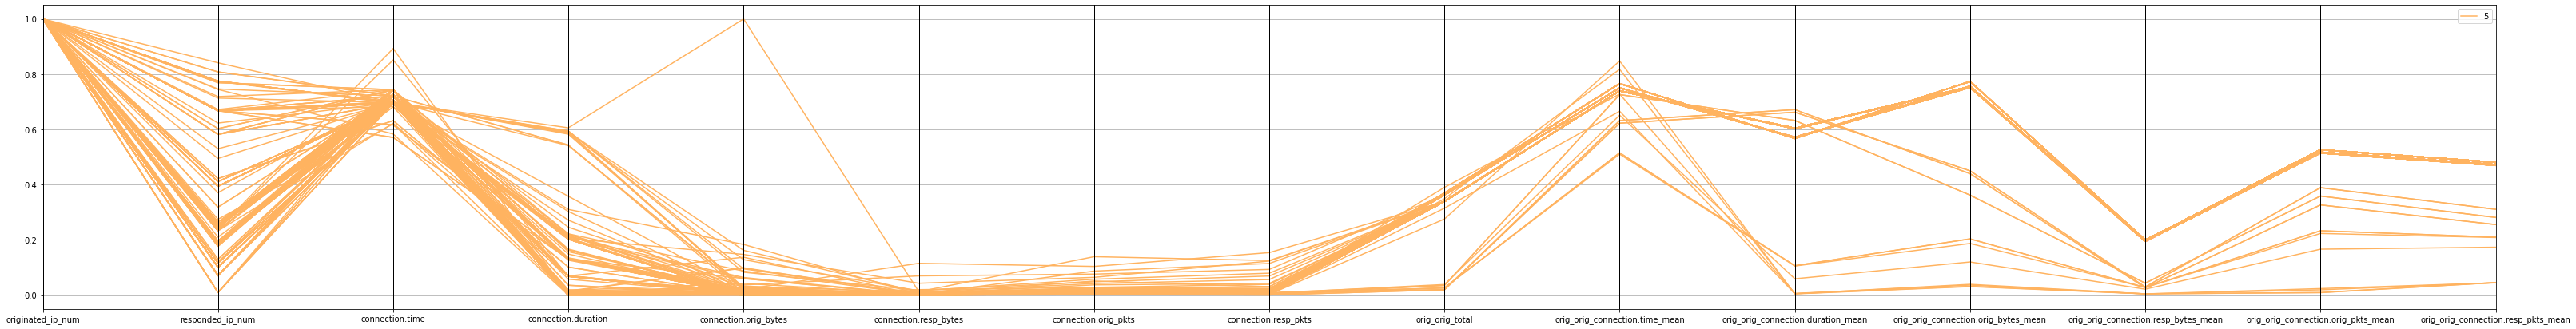

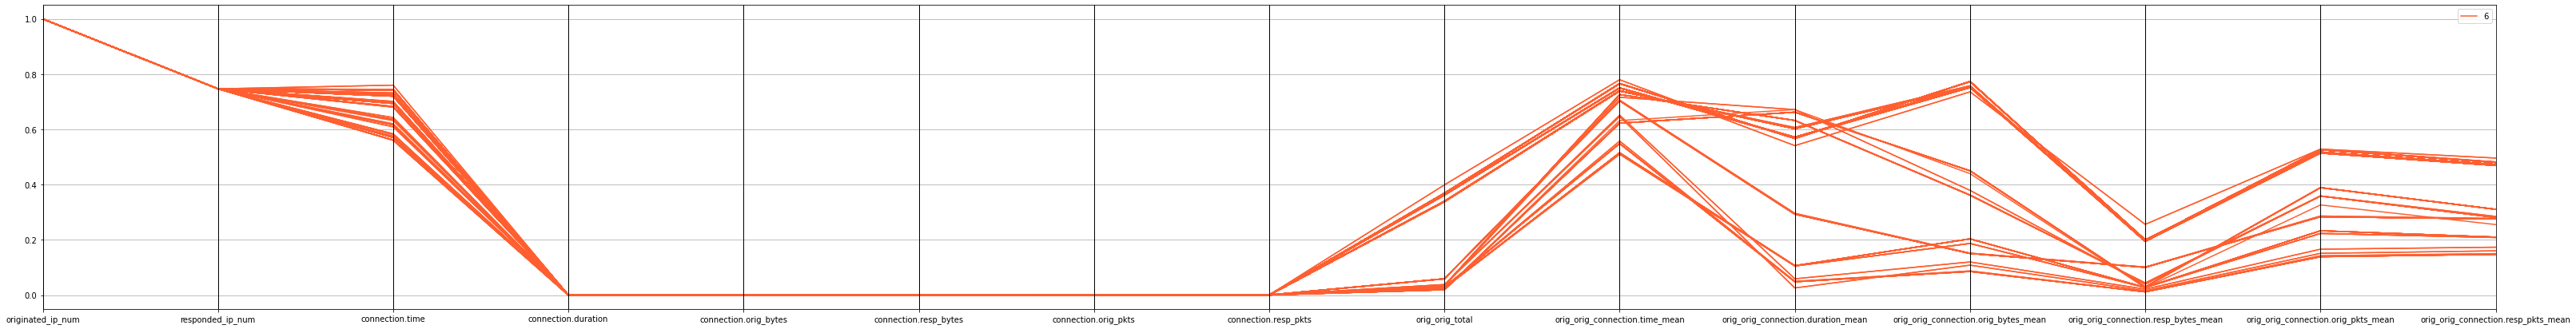

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()